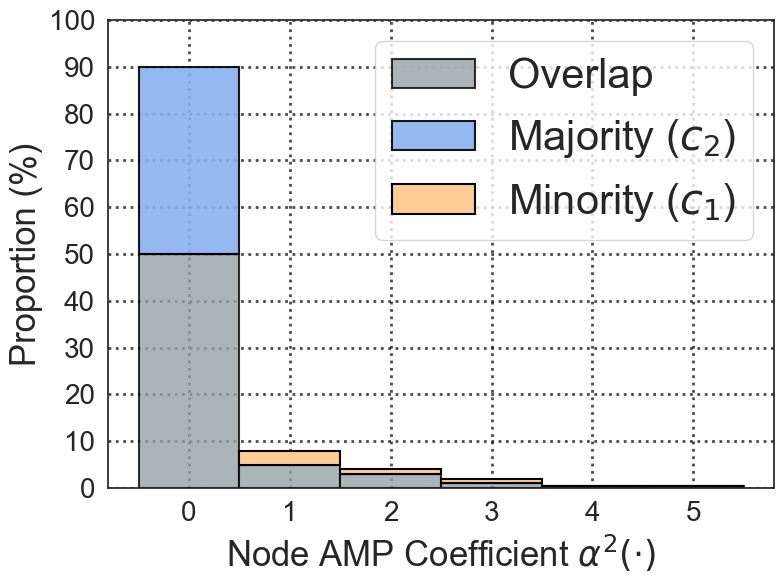

In [125]:
from importlib.resources import read_text

import numpy as np
import matplotlib.pyplot as plt
from imbalanced_ensemble.ensemble import UnderBaggingClassifier
from imbens.ensemble.under_sampling import RUSBoostClassifier, SelfPacedEnsembleClassifier, \
    BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sympy.physics.control.control_plots import matplotlib

# 设置字体大小
text_size = 25

def hex_to_rgb(hex_color):
    """将十六进制颜色转换为 RGB"""
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def rgb_to_hex(rgb_color):
    """将 RGB 颜色转换为十六进制"""
    return '#{:02X}{:02X}{:02X}'.format(*rgb_color)

def mix_colors(color1, color2, alpha=0.5):
    """混合两种颜色"""
    rgb1 = hex_to_rgb(color1)
    rgb2 = hex_to_rgb(color2)
    mixed_rgb = tuple(int(alpha * c1 + (1 - alpha) * c2) for c1, c2 in zip(rgb1, rgb2))
    return rgb_to_hex(mixed_rgb)

# 示例颜色
color1 = "6D9EEB"  # 蓝色
color2 = "F6B26B"  # 橙色
mixed_color = "#97a1a5" # 混合色

# 数据准备
bins = np.arange(6)  # 直方图的区间
majority = [90, 5, 3, 1, 0.5, 0.5]  # 多数类数据
minority = [50, 8, 4, 2, 0.5, 0.5]  # 少数类数据
overlap = [min(maj, mino) for maj, mino in zip(majority, minority)]  # 计算重叠部分

# 绘制图表
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 1  # 调整柱宽，确保柱子之间没有间隙

# 绘制重叠部分（灰色，在底部）
ax.bar(bins, overlap, width=bar_width, color=mixed_color, edgecolor='black', linewidth=1.5, label='Overlap', alpha=0.8)

# 绘制蓝色部分（多数类非重叠部分，在重叠区域之上）
blue_part = [maj - ov for maj, ov in zip(majority, overlap)]
ax.bar(bins, blue_part, width=bar_width, color='#8ab1ef', edgecolor='black', linewidth=1.5, bottom=overlap, label='Majority ($c_2$)', alpha=0.9)

# 绘制橙色部分（少数类非重叠部分，在重叠区域之上）
orange_part = [mino - ov for mino, ov in zip(minority, overlap)]
ax.bar(bins, orange_part, width=bar_width, color='#ffcc95', edgecolor='black', linewidth=1.5, bottom=overlap, label='Minority ($c_1$)', alpha=1)

# 设置坐标轴标签和刻度
ax.set_xlabel('Node AMP Coefficient $\\alpha^2(\\cdot)$', fontsize=text_size)
ax.set_ylabel('Proportion (%)', fontsize=text_size)
ax.set_xticks(bins)
ax.tick_params(axis='both', which='major', labelsize=text_size - 5)

# 修改纵轴刻度密集度为10%
ax.set_yticks(np.arange(0, 101, 10))

# 显示网格（点状样式）
ax.grid(True, linestyle='dotted', linewidth=2.0, alpha=0.7, color='black')

# 添加图例并调整大小
ax.legend(loc='upper right', fontsize=30, frameon=True)

# 调整图表布局
plt.tight_layout()

# 显示图表
plt.show()


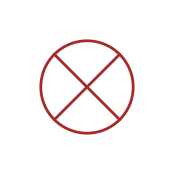

In [126]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.lines import Line2D
import numpy as np

# 创建绘图
fig, ax = plt.subplots(figsize=(2, 2))

# 圆心位置与半径
circle_center = (0.5, 0.5)
radius = 0.3

# 添加圆
circle = Circle(circle_center, radius=radius, edgecolor='brown', facecolor='none', linewidth=2)
ax.add_patch(circle)

# 计算斜线的起点和终点，使它们的长度恰好为圆的直径
# 计算斜线的方向向量
angle = np.pi / 4  # 45度角，用于斜线

# 计算斜线的两个端点
x1 = circle_center[0] + radius * np.cos(angle)
y1 = circle_center[1] + radius * np.sin(angle)

x2 = circle_center[0] - radius * np.cos(angle)
y2 = circle_center[1] - radius * np.sin(angle)

# 添加斜线1，从一个圆的边缘到另一个
x_line1 = Line2D([x1, x2], [y1, y2], color='brown', linewidth=2)

# 计算斜线2，从另一个角度交叉
x3 = circle_center[0] + radius * np.cos(-angle)
y3 = circle_center[1] + radius * np.sin(-angle)

x4 = circle_center[0] - radius * np.cos(-angle)
y4 = circle_center[1] - radius * np.sin(-angle)

x_line2 = Line2D([x3, x4], [y3, y4], color='brown', linewidth=2)

# 添加斜线到图中
ax.add_line(x_line1)
ax.add_line(x_line2)

# 设置轴的范围和比例
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')  # 关闭轴线

# 显示图像
plt.show()


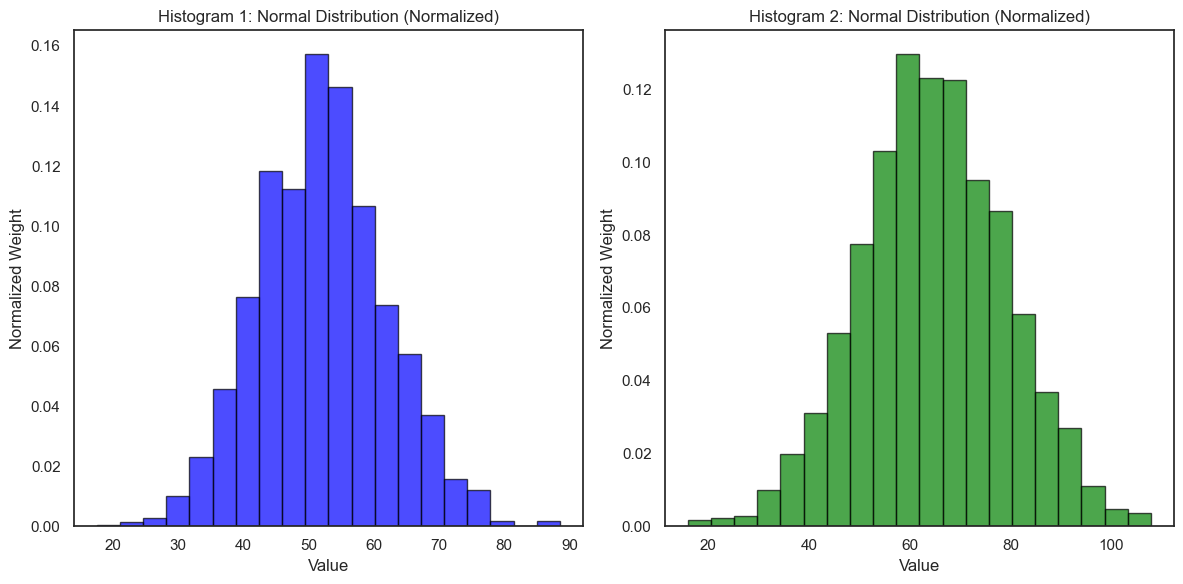

In [127]:
import matplotlib.pyplot as plt
import numpy as np

# 设置随机种子保证结果可复现
np.random.seed(42)

# 生成两个正态分布的权重数据
data1 = np.random.normal(loc=50, scale=10, size=1000)  # 第一组数据：平均值50，标准差10
data2 = np.random.normal(loc=60, scale=15, size=1000)  # 第二组数据：平均值60，标准差15

# 将数据标准化，使权重之和为1
weights1 = data1 / np.sum(data1)
weights2 = data2 / np.sum(data2)

# 创建直方图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 绘制第一个直方图
axes[0].hist(data1, bins=20, weights=weights1, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Histogram 1: Normal Distribution (Normalized)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Normalized Weight')

# 绘制第二个直方图
axes[1].hist(data2, bins=20, weights=weights2, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Histogram 2: Normal Distribution (Normalized)')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Normalized Weight')

# 调整布局并显示
plt.tight_layout()
plt.show()


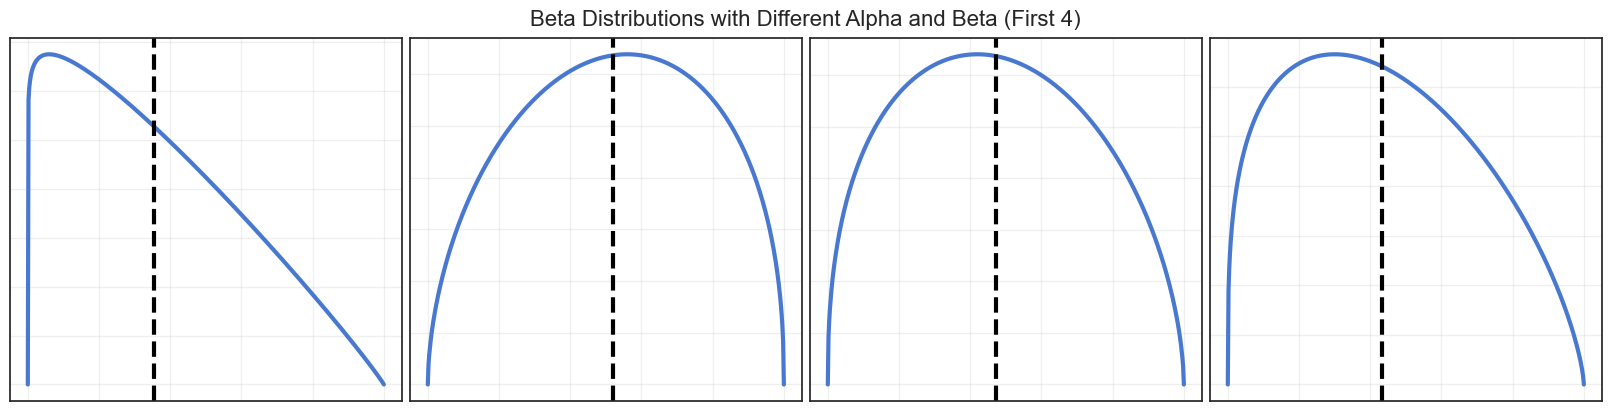

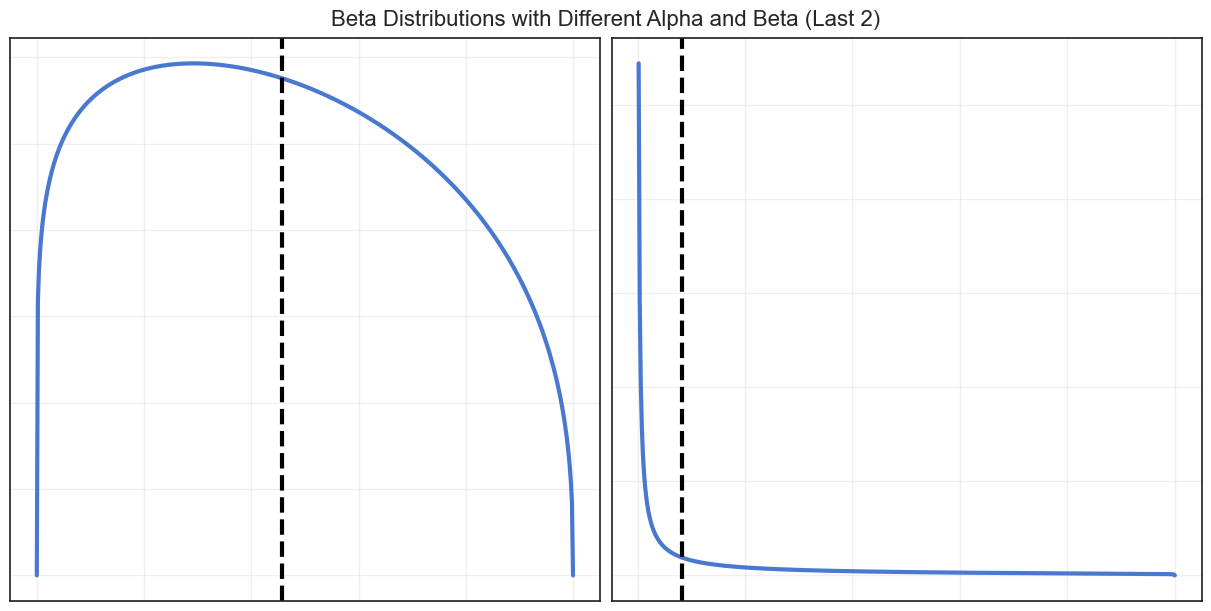

In [128]:
# Re-import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define alpha and beta values
alpha_beta_values = [
    (1.06, 1.94),
    (1.56, 1.44),
    (1.42, 1.58),
    (1.3, 1.7),
    (1.15, 1.364),
    (0.1, 1.1)
]

# Plot beta distributions
x = np.linspace(0, 1, 500)

# Create the first plot (for the first 4 graphs)
fig1, axes1 = plt.subplots(1, 4, figsize=(16, 4), constrained_layout=True)  # 1x4 layout
axes1 = axes1.flatten()

# Plot the first 4 graphs in the first plot
for i, (alpha, beta_value) in enumerate(alpha_beta_values[:4]):  # Only the first 4 values
    y = beta.pdf(x, alpha, beta_value)
    mean = alpha / (alpha + beta_value)
    axes1[i].plot(x, y, linewidth=3)  # Increase the Beta distribution curve line width
    axes1[i].axvline(mean, color='black', linestyle='--', linewidth=3)  # Increase the vertical line width
    axes1[i].grid(alpha=0.3)
    axes1[i].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)  # Hide ticks and labels

fig1.suptitle("Beta Distributions with Different Alpha and Beta (First 4)", fontsize=16)

# Create the second plot (for the last 2 graphs)
fig2, axes2 = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)  # 1x2 layout
axes2 = axes2.flatten()

# Plot the last 2 graphs in the second plot
for i, (alpha, beta_value) in enumerate(alpha_beta_values[4:]):  # Only the last 2 values
    y = beta.pdf(x, alpha, beta_value)
    mean = alpha / (alpha + beta_value)
    axes2[i].plot(x, y, linewidth=3)  # Increase the Beta distribution curve line width
    axes2[i].axvline(mean, color='black', linestyle='--', linewidth=3)  # Increase the vertical line width
    axes2[i].grid(alpha=0.3)
    axes2[i].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)  # Hide ticks and labels

fig2.suptitle("Beta Distributions with Different Alpha and Beta (Last 2)", fontsize=16)

plt.show()


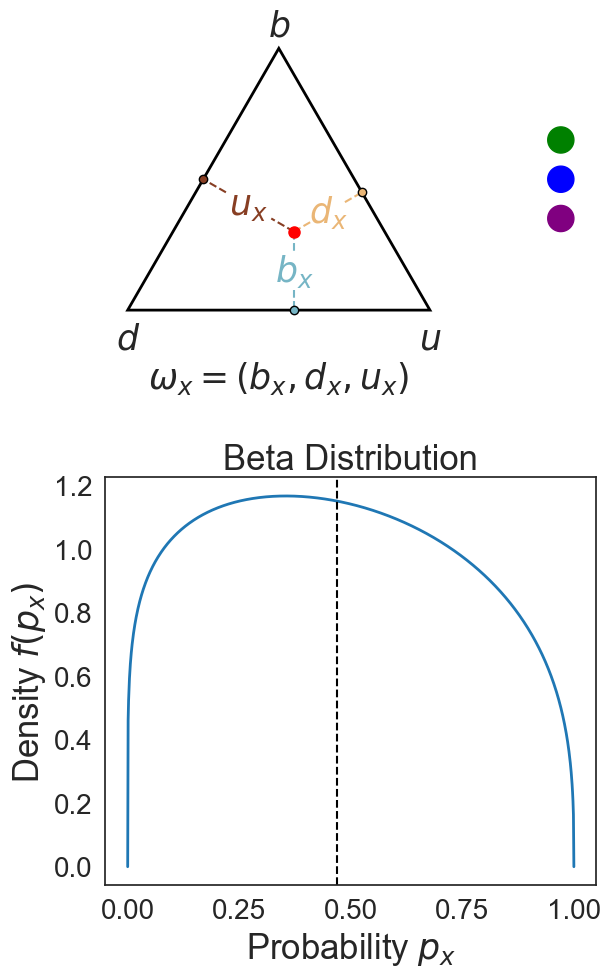

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.patches import RegularPolygon

text_size = 25  # Global font size

# Function to generate vertices of an equilateral triangle
def generate_triangle_vertices():
    L = 2 / np.sqrt(3)  # Side length
    return np.array([[0, 0], [L, 0], [L / 2, 1]])  # Vertices (B, A, C)

# Function to project a point to a line segment (find perpendicular foot)
def project_to_line(p, a, b):
    ap = p - a
    ab = b - a
    t = np.dot(ap, ab) / np.dot(ab, ab)
    t = np.clip(t, 0, 1)  # Ensure projection is within the segment
    return a + t * ab

# Function to generate barycentric grid and convert to Cartesian coordinates
def generate_barycentric_grid(resolution=400):
    b_values = np.linspace(0, 1, resolution)
    d_values = np.linspace(0, 1, resolution)
    grid_b, grid_d = np.meshgrid(b_values, d_values)
    u_values = 1 - grid_b - grid_d  # u = 1 - b - d

    # Mask valid barycentric coordinates where all b, d, and u > 0
    mask = (u_values > 0) & (grid_b > 0) & (grid_d > 0)
    grid_b, grid_d, grid_u = grid_b[mask], grid_d[mask], u_values[mask]

    # Convert to Cartesian coordinates
    L = 2 / np.sqrt(3)
    x = grid_b * L + grid_d * 0 + grid_u * (L / 2)
    y = grid_d * 0 + grid_u * 1
    return x, y, np.vstack([grid_b, grid_d, grid_u]).T  # Cartesian and barycentric

# Function to plot Barycentric triangle with perpendicular lines (First Subplot)
def plot_barycentric_triangle(ax):
    vertices = generate_triangle_vertices()
    L = 2 / np.sqrt(3)

    # Draw triangle
    ax.fill(*zip(*vertices), edgecolor='black', facecolor='white', linewidth=2)

    # Annotate vertices
    ax.text(0, -0.05, r'$d$', fontsize=text_size, ha='center', va='top')
    ax.text(L, -0.05, r'$u$', fontsize=text_size, ha='center', va='top')
    ax.text(L / 2, 1.05, r'$b$', fontsize=text_size, ha='center')

    # Define barycentric coordinates
    disbelief = 0.3
    belief = 0.4
    uncertainty = 1 - disbelief - belief

    # Convert to Cartesian coordinates
    bx = disbelief * 0 + belief * L + uncertainty * (L / 2)
    by = disbelief * 0 + belief * 0 + uncertainty * 1
    barycenter = np.array([bx, by])

    # Plot barycentric point
    ax.plot(bx, by, 'o', color='red', markersize=8, label=r'$C_x$', zorder=5)

    # Draw perpendicular lines in two segments to leave space for text labels
    edge_pairs = [
        (vertices[0], vertices[1], (118/ 255,181/ 255,197/ 255), r'$b_x$'),
        (vertices[1], vertices[2], (234/ 255,182/ 255,118/ 255), r'$d_x$'),
        (vertices[2], vertices[0], (135/ 255,62/ 255,35/ 255), r'$u_x$')
    ]
    for a, b, color, label in edge_pairs:
        foot = project_to_line(barycenter, a, b)
        line_x = [barycenter[0], foot[0]]
        line_y = [barycenter[1], foot[1]]

        # Divide the line into two segments
        mid_x = (barycenter[0] + foot[0]) / 2
        mid_y = (barycenter[1] + foot[1]) / 2

        # Draw first segment
        ax.plot([line_x[0], (line_x[0] + mid_x) / 2], [line_y[0], (line_y[0] + mid_y) / 2],
                '--', color=color, linewidth=1.5)
        # Draw second segment
        ax.plot([(line_x[1] + mid_x) / 2, line_x[1]], [(line_y[1] + mid_y) / 2, line_y[1]],
                '--', color=color, linewidth=1.5)

        # Plot foot of the perpendicular
        ax.plot(foot[0], foot[1], 'o', color=color, markersize=6, markeredgecolor='black')

        # Add label at the center of the line
        ax.text(mid_x, mid_y, label, fontsize=text_size, color=color, ha='center', va='center')

    # # Add custom arrow and pattern
    # ax.annotate('', xy=(1.1, 0.5), xytext=(L / 2, 0.5),  # Arrow start and end points
    #             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))

    # Draw circles using RegularPolygon
    circle_x = 2 / np.sqrt(3) + 0.5  # Align with colorbar x-coordinate
    radius = 0.05
    circle_centers = [0.5, 0.65, 0.35]
    circle_colors = ['blue', 'green', 'purple']
    for center, color in zip(circle_centers, circle_colors):
        patch = RegularPolygon((circle_x, center), numVertices=50, radius=radius, color=color, zorder=10)
        ax.add_patch(patch)

    # Add label below the triangle
    ax.text(L / 2, -0.3, r'$\omega_x=(b_x, d_x, u_x)$', fontsize=text_size, ha='center')

    # Axis settings
    ax.set_aspect('equal')
    ax.axis('off')

# Function to plot Beta distribution and the Barycentric triangle
def plot_combined_plots():
    # Create figure with subplots in a vertical layout (2 rows, 1 column)
    fig, axes = plt.subplots(2, 1, figsize=(6, 10), gridspec_kw={'hspace': 0.1}, constrained_layout=True)

    # First subplot: Barycentric triangle
    plot_barycentric_triangle(axes[0])

    # Second subplot: Beta Distribution Plot
    x = np.linspace(0, 1, 1000)
    alpha, beta_param = (1.183, 1.333)  # Parameters for Beta distribution
    y = beta.pdf(x, alpha, beta_param)

    axes[1].plot(x, y, color='#1f77b4', linewidth=2)

    # Add vertical dashed line at the most likely point for this Beta distribution
    mode = (alpha) / (alpha + beta_param)
    if mode is not None:
        axes[1].axvline(x=mode, color='black', linestyle='--', label=f'Mode = {mode:.2f}')

    axes[1].set_xlabel('Probability $p_x$', fontsize=text_size)
    axes[1].set_ylabel('Density $f(p_x)$', fontsize=text_size)
    axes[1].set_title('Beta Distribution', fontsize=text_size)
    
    # Adjust tick labels
    axes[1].tick_params(axis='x', labelsize=20)  # Increase font size for x-axis ticks
    axes[1].tick_params(axis='y', labelsize=20)  # Increase font size for y-axis ticks

    # Display a legend
    # axes[1].legend(fontsize=text_size)

    plt.show()

# Execute the combined function
plot_combined_plots()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.ensemble import EasyEnsembleClassifier
from imbens.ensemble import *
from sklearn.ensemble import RandomForestClassifier
import joblib  # 用于保存模型
import json  # 用于保存种子
from sklearn.datasets import make_moons
from collections import Counter
from matplotlib.lines import Line2D
from UADF import UncertaintyAwareDeepForest
from demo import get_config
from imbens.metrics import geometric_mean_score
from sklearn.metrics import f1_score, average_precision_score, roc_auc_score
from deepforest import CascadeForestClassifier

def interpolate_safe_majority_class(X, y, classifier, threshold=0.5, num_samples_to_generate=20, add_old = False, seed=42):
    """
    对安全的多数类样本进行插值生成新样本，并保存插值的种子
    X: 数据特征
    y: 类别标签
    classifier: 已训练的分类器
    threshold: 确定“安全样本”的预测概率阈值
    num_samples_to_generate: 需要插值生成的样本数
    seed: 随机种子
    """
    # 设置随机种子，以确保可重复性
    # np.random.seed(seed)
    
    # 计算每个样本的预测概率
    proba = classifier.predict_proba(X)
    
    # 选择安全样本：对于多数类（类别0），其属于类别0的概率大于阈值
    majority_class_samples = X[y == 0]
    majority_class_probs = proba[y == 0, 0]  # 获取多数类样本属于类别0的概率
    majority_class_probs = np.array(majority_class_probs)
    
    print(majority_class_probs)
    print(np.where(majority_class_probs > threshold))
    # 选择概率大于阈值的安全样本
    safe_samples_idx = np.where(majority_class_probs > threshold)[0]
    print(safe_samples_idx)
    safe_samples = majority_class_samples[safe_samples_idx]

    # 用于存储插值生成的新样本
    new_samples = []
    
    # 插值过程：在安全样本之间进行插值
    for _ in range(num_samples_to_generate):
        # 随机选择两个安全多数类样本
        idx1, idx2 = np.random.choice(len(safe_samples), 2, replace=False)
        sample1, sample2 = safe_samples[idx1], safe_samples[idx2]
        
        # 在这两个样本之间进行线性插值
        new_sample = sample1 + np.random.rand() * (sample2 - sample1)
        
        # 将插值生成的新样本添加到列表中
        new_samples.append(new_sample)
    
    # 将生成的新样本添加到原数据中
    new_samples = np.array(new_samples)
    if add_old == True:
        X_new = np.vstack([X, new_samples])
        y_new = np.hstack([y, np.zeros(num_samples_to_generate)])  # 新样本的标签为0（多数类）
    else:
        X_new = new_samples
        y_new = np.zeros(num_samples_to_generate)
    
    # 保存随机种子到文件
    with open("interpolation_seed.json", "w") as f:
        json.dump({"seed": seed}, f)
    
    return X_new, y_new

def evaluate_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # 获取预测正类的概率

    f1_macro = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_prob)
    aupr = average_precision_score(y_test, y_prob)
    gmean = geometric_mean_score(y_test, y_pred)

    return {
        "F1-macro": f1_macro,
        "AUC": auc,
        "AUPR": aupr,
        "Gmean": gmean
    }

# 循环10次并计算平均值和标准差
def evaluate_multiple_runs(model_class, model_params, X, y, n_runs=10):
    results = {"F1-macro": [], "AUC": [], "AUPR": [], "Gmean": []}

    for i in range(n_runs):
        
        # 训练EasyEnsemble分类器
        rf = EasyEnsembleClassifier(n_estimators=20)
        rf.fit(X, y)
        
        # 对安全多数类样本进行插值
        X_train, y_train = interpolate_safe_majority_class(X, y, rf, add_old=True, threshold=0.4, num_samples_to_generate=80, seed=5)
        
        X_test, y_test = make_moons(n_samples=10, noise=0.3, random_state=37)
        X_test_resampled, y_test_resampled = interpolate_safe_majority_class(X, y, rf, add_old=False, threshold=0.4, num_samples_to_generate=45, seed=5)
        
        X_test = np.vstack([X_test, X_test_resampled])
        y_test = np.hstack([y_test, y_test_resampled])
        # 初始化并训练模型
        # model = model_class(**model_params)
        model = UncertaintyAwareDeepForest(config=get_config())
        model.fit(X_train, y_train)
        

        # 评估模型
        performance = evaluate_model_performance(model, X_test, y_test)
        print(performance)
        # 记录结果
        for metric, value in performance.items():
            results[metric].append(value)

    # 计算平均值和标准差
    avg_std_results = {
        metric: {
            "mean": np.mean(values),
            "std": np.std(values)
        }
        for metric, values in results.items()
    }

    return avg_std_results

if __name__ == "__main__":
    # Set constants for plot styling
    text_size = 30  # Adjust text size slightly to fit layout
    linewidth = 2  # Line width for plot styling

    # 生成均衡数据集
    X, y = make_moons(n_samples=40, noise=0.3, random_state=36)

    # 对类别 1 进行下采样
    minority_class_samples = X[y == 1]
    majority_class_samples = X[y == 0]

    # 保留所有的多数类样本，减少少数类样本至 50 个
    minority_class_samples = minority_class_samples[:10]

    # 合并数据，生成不均衡数据集
    X = np.vstack([majority_class_samples, minority_class_samples])
    y = np.hstack([np.zeros(len(majority_class_samples)), np.ones(len(minority_class_samples))])

    # 训练EasyEnsemble分类器
    rf = EasyEnsembleClassifier(n_estimators=20)
    rf.fit(X, y)
    
    # 对安全多数类样本进行插值
    X_resampled, y_resampled = interpolate_safe_majority_class(X, y, rf, threshold=0.4, num_samples_to_generate=80, seed=5)
    
    X_test, y_test = make_moons(n_samples=10, noise=0.3, random_state=37)
    X_test_resampled, y_test_resampled = interpolate_safe_majority_class(X, y, rf, threshold=0.4, num_samples_to_generate=45, seed=5)
    
    models_to_evaluate = [
    {"name": "EasyEnsembleClassifier", "class": EasyEnsembleClassifier, "params": {"n_estimators": 100}, "X_train": X, "y_train": y},
    # {"name": "BalanceCascadeClassifier", "class": BalanceCascadeClassifier, "params": {"n_estimators": 100}, "X_train": X, "y_train": y},
    # {"name": "UnderBagging", "class": UnderBaggingClassifier, "params": {"n_estimators": 100}, "X_train": X, "y_train": y},
    # {"name": "RUSBoost", "class": RUSBoostClassifier, "params": {"n_estimators": 100}, "X_train": X, "y_train": y},
    # {"name": "SelfPacedEnsemble", "class": SelfPacedEnsembleClassifier, "params": {"n_estimators": 100}, "X_train": X, "y_train": y},
    # {"name": "BalancedRandomForest", "class": BalancedRandomForestClassifier, "params": {"n_estimators": 100}, "X_train": X, "y_train": y}
        
    ]

    # 初始化表格数据
    results_table = []
    
    # 循环评估多个模型
    for model_info in models_to_evaluate:
        print(f"Evaluating {model_info['name']}:")
        results = evaluate_multiple_runs(
            model_class=model_info["class"],
            model_params=model_info["params"],
            X=model_info["X_train"],
            y=model_info["y_train"]
        )
        
        # 整理结果到表格
        results_table.append({
            "Model": model_info["name"],
            **{metric: f"{values['mean']:.4f} ± {values['std']:.4f}" for metric, values in results.items()}
        })
    
    # 转换为DataFrame并打印
    results_df = pd.DataFrame(results_table)
    print(results_df)
    
    # 保存结果到CSV文件
    results_df.to_csv("artificial_dataset_performance_results.csv", index=False)

    # 读取保存的 resampled 数据
    # X_resampled = np.load("X_resampled.npy")
    # y_resampled = np.load("y_resampled.npy")

    print(Counter(y_resampled))
    
    ee = EasyEnsembleClassifier(n_estimators=100)
    ee.fit(X_resampled, y_resampled)
    
    evaluate_model_performance(ee, X_test_resampled, y_test_resampled)
    
    # 训练BalancedCascade分类器
    bc = BalanceCascadeClassifier(n_estimators=100)
    bc.fit(X, y)
    
    evaluate_model_performance(bc, X_test_resampled, y_test_resampled)

    # 创建网格用于绘制决策边界
    x_min, x_max = X_resampled[:, 0].min() - 1, X_resampled[:, 0].max() + 1
    y_min, y_max = X_resampled[:, 1].min() - 1, X_resampled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    # 使用EasyEnsemble模型预测网格点
    Z_easyensemble = ee.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_easyensemble = Z_easyensemble.reshape(xx.shape)
    
    
    # 使用BalancedCascade模型预测网格点
    Z_balancedcascade = bc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_balancedcascade = Z_balancedcascade.reshape(xx.shape)
    
    # 创建子图并设置大小
    fig, ax = plt.subplots(figsize=(8,8), dpi=400)
    # 绘制样本点
    scatter = ax.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap=plt.cm.Paired, s=150, edgecolor='black', alpha=0.6)
    # 绘制EasyEnsemble决策边界（只绘制虚线边界）
    ax.contour(xx, yy, Z_easyensemble, colors='blue', linewidths=2, linestyles='dashed')
    ax.contour(xx, yy, Z_balancedcascade, colors='green', linewidths=2, linestyles='dashed')
    plt.show()
    
    uadf = UncertaintyAwareDeepForest(config=get_config())
    uadf.fit(X_resampled, y_resampled)
    
    evaluate_model_performance(uadf, X_test_resampled, y_test_resampled)
    
    
    # 使用UADF模型预测网格点
    Z_uadf = uadf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_uadf = Z_uadf.reshape(xx.shape)

    # 创建子图并设置大小
    fig, ax = plt.subplots(figsize=(8,8), dpi=400)

    # 绘制EasyEnsemble决策边界（只绘制虚线边界）
    ax.contour(xx, yy, Z_easyensemble, colors='blue', linewidths=2, linestyles='dashed')  # EasyEnsemble: 虚线边界
    
    # 绘制BalancedCascade决策边界（只绘制虚线边界）
    ax.contour(xx, yy, Z_balancedcascade, colors='green', linewidths=2, linestyles='dashed')  # BalancedCascade: 虚线边界

    ax.contour(xx, yy, Z_uadf, colors='purple', linewidths=2, linestyles='dashed')
    
    
    
    # 绘制样本点
    scatter = ax.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap=plt.cm.Paired, s=150, edgecolor='black', alpha=0.6)

    # 手动设置legend
    handles, labels = scatter.legend_elements()
    labels = ['Majority', 'Minority']  # 修改legend标签

    # Create custom legend for decision boundaries
    boundary_legend = [Line2D([0], [0], color='blue', lw=2, label='EasyEnsemble', linestyle='dashed'),
                       Line2D([0], [0], color='green', lw=2, label='BalancedCascade', linestyle='dashed'),
                       Line2D([0], [0], color='purple', lw=2, label='UABDF', linestyle='dashed')]
    
    class_patch = Line2D([0], [0], color='white', lw=0, label='Class')
    # Combine both legends
    ax.legend([class_patch] + handles + [class_patch] + boundary_legend, ['class'] + labels + ['decision boundary'] + ['EasyEnsemble', 'BalancedCascade', 'UABDF'], fontsize=12, loc='upper right')

    ax.set_xlabel("Feature 1", fontsize=text_size)
    ax.set_ylabel("Feature 2", fontsize=text_size)
    ax.grid(True, linestyle="dotted", alpha=0.7, linewidth=2.5)

    # 加粗边框
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)

    # 调整x轴和y轴刻度标签的字体大小
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=12)

    # 调整布局并保存图像
    plt.tight_layout()
    plt.savefig("fig/decision_boundaries_both_models_with_legend.jpg")
    plt.show()


Begin to train.... - 2025-01-28 14:35:09,399 - UncertaintyAwareDeepForest
the shape of training samples: (110, 2) - 2025-01-28 14:35:09,400 - UncertaintyAwareDeepForest
use gmean as training evaluation - 2025-01-28 14:35:09,401 - UncertaintyAwareDeepForest
stacking: False, save model: False - 2025-01-28 14:35:09,401 - UncertaintyAwareDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2025-01-28 14:35:09,402 - UncertaintyAwareDeepForest


[0.72027845 0.73613086 0.60388404 0.64319933 0.76902917 0.95034374
 0.98445058 0.82675781 0.748638   0.98445058 0.99007648 0.98445058
 0.71903041 0.98445058 0.66121732 0.37735801 0.61304673 0.90335815
 0.90335815 0.61635927]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19]
[0.72027845 0.73613086 0.60388404 0.64319933 0.76902917 0.95034374
 0.98445058 0.82675781 0.748638   0.98445058 0.99007648 0.98445058
 0.71903041 0.98445058 0.66121732 0.37735801 0.61304673 0.90335815
 0.90335815 0.61635927]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19]
Evaluating EasyEnsembleClassifier:
[0.78491884 0.78857564 0.65901856 0.71248325 0.91001861 0.91153217
 0.97650901 0.68556312 0.67237567 0.97650901 0.95869776 0.97650901
 0.91009412 0.97650901 0.81826892 0.34808513 0.54

The evaluation[gmean] of layer_0 is 0.6293 - 2025-01-28 14:35:19,338 - UncertaintyAwareDeepForest
-----------------------------------------layer-1-------------------------------------------- - 2025-01-28 14:35:19,339 - UncertaintyAwareDeepForest


num_layers: 1


The evaluation[gmean] of layer_1 is 0.8764 - 2025-01-28 14:35:28,943 - UncertaintyAwareDeepForest
-----------------------------------------layer-2-------------------------------------------- - 2025-01-28 14:35:28,944 - UncertaintyAwareDeepForest


num_layers: 2


The evaluation[gmean] of layer_2 is 0.8718 - 2025-01-28 14:35:38,205 - UncertaintyAwareDeepForest
best_layer: 1, current_layer:2, save layers: 2 - 2025-01-28 14:35:38,205 - UncertaintyAwareDeepForest
training finish... - 2025-01-28 14:35:38,206 - UncertaintyAwareDeepForest


num_layers: 3
last_layer_index 1
last_layer_index 1
{'F1-macro': 0.78, 'AUC': 0.9359999999999999, 'AUPR': 0.6803174603174602, 'Gmean': 0.758946638440411}
[0.6121511  0.58798733 0.7394415  0.59133209 0.73821374 0.86110823
 0.98740075 0.76780707 0.76863757 0.98740075 0.91371617 0.98740075
 0.73695892 0.98740075 0.82286526 0.50543874 0.52134726 0.87896669
 0.87896669 0.42849196]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0.6121511  0.58798733 0.7394415  0.59133209 0.73821374 0.86110823
 0.98740075 0.76780707 0.76863757 0.98740075 0.91371617 0.98740075
 0.73695892 0.98740075 0.82286526 0.50543874 0.52134726 0.87896669
 0.87896669 0.42849196]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


Begin to train.... - 2025-01-28 14:36:16,945 - UncertaintyAwareDeepForest
the shape of training samples: (110, 2) - 2025-01-28 14:36:16,946 - UncertaintyAwareDeepForest
use gmean as training evaluation - 2025-01-28 14:36:16,946 - UncertaintyAwareDeepForest
stacking: False, save model: False - 2025-01-28 14:36:16,946 - UncertaintyAwareDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2025-01-28 14:36:16,947 - UncertaintyAwareDeepForest
The evaluation[gmean] of layer_0 is 0.6325 - 2025-01-28 14:36:26,379 - UncertaintyAwareDeepForest
-----------------------------------------layer-1-------------------------------------------- - 2025-01-28 14:36:26,380 - UncertaintyAwareDeepForest


num_layers: 1


The evaluation[gmean] of layer_1 is 0.8809 - 2025-01-28 14:36:36,156 - UncertaintyAwareDeepForest
-----------------------------------------layer-2-------------------------------------------- - 2025-01-28 14:36:36,157 - UncertaintyAwareDeepForest


num_layers: 2


The evaluation[gmean] of layer_2 is 0.8764 - 2025-01-28 14:36:45,730 - UncertaintyAwareDeepForest
best_layer: 1, current_layer:2, save layers: 2 - 2025-01-28 14:36:45,731 - UncertaintyAwareDeepForest
training finish... - 2025-01-28 14:36:45,732 - UncertaintyAwareDeepForest


num_layers: 3
last_layer_index 1
last_layer_index 1
{'F1-macro': 0.8184818481848184, 'AUC': 0.948, 'AUPR': 0.7222222222222221, 'Gmean': 0.7668115805072325}
[0.82252398 0.78776541 0.63318065 0.87051535 0.77937362 0.96177674
 0.98537869 0.68265201 0.69752525 0.98537869 0.93809143 0.98537869
 0.78593697 0.98537869 0.77728392 0.25250689 0.45506915 0.95490309
 0.95490309 0.54130265]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19]
[0.82252398 0.78776541 0.63318065 0.87051535 0.77937362 0.96177674
 0.98537869 0.68265201 0.69752525 0.98537869 0.93809143 0.98537869
 0.78593697 0.98537869 0.77728392 0.25250689 0.45506915 0.95490309
 0.95490309 0.54130265]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19]


Begin to train.... - 2025-01-28 14:37:24,629 - UncertaintyAwareDeepForest
the shape of training samples: (110, 2) - 2025-01-28 14:37:24,631 - UncertaintyAwareDeepForest
use gmean as training evaluation - 2025-01-28 14:37:24,631 - UncertaintyAwareDeepForest
stacking: False, save model: False - 2025-01-28 14:37:24,632 - UncertaintyAwareDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2025-01-28 14:37:24,632 - UncertaintyAwareDeepForest
The evaluation[gmean] of layer_0 is 0.5367 - 2025-01-28 14:37:34,264 - UncertaintyAwareDeepForest
-----------------------------------------layer-1-------------------------------------------- - 2025-01-28 14:37:34,265 - UncertaintyAwareDeepForest


num_layers: 1


The evaluation[gmean] of layer_1 is 0.8532 - 2025-01-28 14:37:43,635 - UncertaintyAwareDeepForest
-----------------------------------------layer-2-------------------------------------------- - 2025-01-28 14:37:43,636 - UncertaintyAwareDeepForest


num_layers: 2


The evaluation[gmean] of layer_2 is 0.8672 - 2025-01-28 14:37:52,786 - UncertaintyAwareDeepForest
-----------------------------------------layer-3-------------------------------------------- - 2025-01-28 14:37:52,787 - UncertaintyAwareDeepForest


num_layers: 3


The evaluation[gmean] of layer_3 is 0.8240 - 2025-01-28 14:38:02,563 - UncertaintyAwareDeepForest
best_layer: 2, current_layer:3, save layers: 3 - 2025-01-28 14:38:02,563 - UncertaintyAwareDeepForest
training finish... - 2025-01-28 14:38:02,564 - UncertaintyAwareDeepForest


num_layers: 4
last_layer_index 2
last_layer_index 2
{'F1-macro': 0.6946867565424266, 'AUC': 0.8240000000000001, 'AUPR': 0.6303603603603604, 'Gmean': 0.7348469228349535}
[0.66351684 0.54870559 0.70556058 0.534322   0.85505102 0.9089394
 0.97790931 0.63560233 0.73197825 0.97790931 0.92050289 0.97790931
 0.78331648 0.97790931 0.72740733 0.61833578 0.51421875 0.73646263
 0.73646263 0.36541478]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[0.66351684 0.54870559 0.70556058 0.534322   0.85505102 0.9089394
 0.97790931 0.63560233 0.73197825 0.97790931 0.92050289 0.97790931
 0.78331648 0.97790931 0.72740733 0.61833578 0.51421875 0.73646263
 0.73646263 0.36541478]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


Begin to train.... - 2025-01-28 14:39:09,015 - UncertaintyAwareDeepForest
the shape of training samples: (110, 2) - 2025-01-28 14:39:09,016 - UncertaintyAwareDeepForest
use gmean as training evaluation - 2025-01-28 14:39:09,016 - UncertaintyAwareDeepForest
stacking: False, save model: False - 2025-01-28 14:39:09,017 - UncertaintyAwareDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2025-01-28 14:39:09,017 - UncertaintyAwareDeepForest
The evaluation[gmean] of layer_0 is 0.5394 - 2025-01-28 14:39:18,869 - UncertaintyAwareDeepForest
-----------------------------------------layer-1-------------------------------------------- - 2025-01-28 14:39:18,870 - UncertaintyAwareDeepForest


num_layers: 1


The evaluation[gmean] of layer_1 is 0.7629 - 2025-01-28 14:39:28,453 - UncertaintyAwareDeepForest
-----------------------------------------layer-2-------------------------------------------- - 2025-01-28 14:39:28,454 - UncertaintyAwareDeepForest


num_layers: 2


The evaluation[gmean] of layer_2 is 0.8240 - 2025-01-28 14:39:37,728 - UncertaintyAwareDeepForest
-----------------------------------------layer-3-------------------------------------------- - 2025-01-28 14:39:37,729 - UncertaintyAwareDeepForest


num_layers: 3


The evaluation[gmean] of layer_3 is 0.7629 - 2025-01-28 14:39:47,698 - UncertaintyAwareDeepForest
best_layer: 2, current_layer:3, save layers: 3 - 2025-01-28 14:39:47,699 - UncertaintyAwareDeepForest
training finish... - 2025-01-28 14:39:47,699 - UncertaintyAwareDeepForest


num_layers: 4
last_layer_index 2
last_layer_index 2


Begin to train.... - 2025-01-28 14:40:52,045 - UncertaintyAwareDeepForest


{'F1-macro': 0.6526315789473685, 'AUC': 0.86, 'AUPR': 0.6840958605664488, 'Gmean': 0.7183313998427188}
[0.65134168 0.76991505 0.48838407 0.80277129 0.72230631 0.92028107
 0.99148636 0.45895192 0.64783655 0.99148636 0.90065422 0.99148636
 0.76743869 0.99148636 0.8141002  0.36739958 0.34666812 0.99128936
 0.99128936 0.58044823]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 17, 18,
       19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 17 18 19]
[0.65134168 0.76991505 0.48838407 0.80277129 0.72230631 0.92028107
 0.99148636 0.45895192 0.64783655 0.99148636 0.90065422 0.99148636
 0.76743869 0.99148636 0.8141002  0.36739958 0.34666812 0.99128936
 0.99128936 0.58044823]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 17, 18,
       19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 17 18 19]


the shape of training samples: (110, 2) - 2025-01-28 14:40:52,046 - UncertaintyAwareDeepForest
use gmean as training evaluation - 2025-01-28 14:40:52,046 - UncertaintyAwareDeepForest
stacking: False, save model: False - 2025-01-28 14:40:52,046 - UncertaintyAwareDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2025-01-28 14:40:52,046 - UncertaintyAwareDeepForest
The evaluation[gmean] of layer_0 is 0.6964 - 2025-01-28 14:41:01,937 - UncertaintyAwareDeepForest
-----------------------------------------layer-1-------------------------------------------- - 2025-01-28 14:41:01,938 - UncertaintyAwareDeepForest


num_layers: 1


The evaluation[gmean] of layer_1 is 0.8155 - 2025-01-28 14:41:11,283 - UncertaintyAwareDeepForest
-----------------------------------------layer-2-------------------------------------------- - 2025-01-28 14:41:11,283 - UncertaintyAwareDeepForest


num_layers: 2


The evaluation[gmean] of layer_2 is 0.8240 - 2025-01-28 14:41:20,702 - UncertaintyAwareDeepForest
-----------------------------------------layer-3-------------------------------------------- - 2025-01-28 14:41:20,703 - UncertaintyAwareDeepForest


num_layers: 3


The evaluation[gmean] of layer_3 is 0.8240 - 2025-01-28 14:41:30,277 - UncertaintyAwareDeepForest
best_layer: 2, current_layer:3, save layers: 3 - 2025-01-28 14:41:30,278 - UncertaintyAwareDeepForest
training finish... - 2025-01-28 14:41:30,278 - UncertaintyAwareDeepForest


num_layers: 4
last_layer_index 2
last_layer_index 2


Begin to train.... - 2025-01-28 14:42:36,724 - UncertaintyAwareDeepForest


{'F1-macro': 0.8184818481848184, 'AUC': 0.972, 'AUPR': 0.7416666666666667, 'Gmean': 0.7668115805072325}
[0.61479969 0.78127142 0.66239774 0.7781497  0.67616226 0.83705778
 0.97691862 0.70839642 0.70025914 0.97691862 0.86831031 0.97691862
 0.65576298 0.97691862 0.7599254  0.22713398 0.4058672  0.92699078
 0.92699078 0.57865083]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19]
[0.61479969 0.78127142 0.66239774 0.7781497  0.67616226 0.83705778
 0.97691862 0.70839642 0.70025914 0.97691862 0.86831031 0.97691862
 0.65576298 0.97691862 0.7599254  0.22713398 0.4058672  0.92699078
 0.92699078 0.57865083]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19]


the shape of training samples: (110, 2) - 2025-01-28 14:42:36,724 - UncertaintyAwareDeepForest
use gmean as training evaluation - 2025-01-28 14:42:36,724 - UncertaintyAwareDeepForest
stacking: False, save model: False - 2025-01-28 14:42:36,726 - UncertaintyAwareDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2025-01-28 14:42:36,727 - UncertaintyAwareDeepForest
The evaluation[gmean] of layer_0 is 0.6293 - 2025-01-28 14:42:46,885 - UncertaintyAwareDeepForest
-----------------------------------------layer-1-------------------------------------------- - 2025-01-28 14:42:46,886 - UncertaintyAwareDeepForest


num_layers: 1


The evaluation[gmean] of layer_1 is 0.9198 - 2025-01-28 14:42:56,367 - UncertaintyAwareDeepForest
-----------------------------------------layer-2-------------------------------------------- - 2025-01-28 14:42:56,368 - UncertaintyAwareDeepForest


num_layers: 2


The evaluation[gmean] of layer_2 is 0.8672 - 2025-01-28 14:43:05,906 - UncertaintyAwareDeepForest
best_layer: 1, current_layer:2, save layers: 2 - 2025-01-28 14:43:05,907 - UncertaintyAwareDeepForest
training finish... - 2025-01-28 14:43:05,908 - UncertaintyAwareDeepForest


num_layers: 3
last_layer_index 1
last_layer_index 1


Begin to train.... - 2025-01-28 14:43:46,795 - UncertaintyAwareDeepForest


{'F1-macro': 0.78, 'AUC': 0.944, 'AUPR': 0.7214285714285713, 'Gmean': 0.758946638440411}
[0.76525212 0.73793363 0.7165462  0.69150963 0.67970633 0.87077331
 0.97197286 0.69628798 0.79928493 0.97197286 0.92947402 0.97197286
 0.67978729 0.97197286 0.8465754  0.50780922 0.40689053 0.97197286
 0.97197286 0.59145937]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0.76525212 0.73793363 0.7165462  0.69150963 0.67970633 0.87077331
 0.97197286 0.69628798 0.79928493 0.97197286 0.92947402 0.97197286
 0.67978729 0.97197286 0.8465754  0.50780922 0.40689053 0.97197286
 0.97197286 0.59145937]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


the shape of training samples: (110, 2) - 2025-01-28 14:43:46,796 - UncertaintyAwareDeepForest
use gmean as training evaluation - 2025-01-28 14:43:46,797 - UncertaintyAwareDeepForest
stacking: False, save model: False - 2025-01-28 14:43:46,797 - UncertaintyAwareDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2025-01-28 14:43:46,798 - UncertaintyAwareDeepForest
The evaluation[gmean] of layer_0 is 0.4427 - 2025-01-28 14:43:56,283 - UncertaintyAwareDeepForest
-----------------------------------------layer-1-------------------------------------------- - 2025-01-28 14:43:56,284 - UncertaintyAwareDeepForest


num_layers: 1


The evaluation[gmean] of layer_1 is 0.7389 - 2025-01-28 14:44:05,809 - UncertaintyAwareDeepForest
-----------------------------------------layer-2-------------------------------------------- - 2025-01-28 14:44:05,809 - UncertaintyAwareDeepForest


num_layers: 2


The evaluation[gmean] of layer_2 is 0.7589 - 2025-01-28 14:44:15,542 - UncertaintyAwareDeepForest
-----------------------------------------layer-3-------------------------------------------- - 2025-01-28 14:44:15,543 - UncertaintyAwareDeepForest


num_layers: 3


The evaluation[gmean] of layer_3 is 0.7668 - 2025-01-28 14:44:24,719 - UncertaintyAwareDeepForest
-----------------------------------------layer-4-------------------------------------------- - 2025-01-28 14:44:24,719 - UncertaintyAwareDeepForest


num_layers: 4


The evaluation[gmean] of layer_4 is 0.7668 - 2025-01-28 14:44:33,924 - UncertaintyAwareDeepForest
best_layer: 3, current_layer:4, save layers: 4 - 2025-01-28 14:44:33,925 - UncertaintyAwareDeepForest
training finish... - 2025-01-28 14:44:33,925 - UncertaintyAwareDeepForest


num_layers: 5
last_layer_index 3
last_layer_index 3


Begin to train.... - 2025-01-28 14:46:07,107 - UncertaintyAwareDeepForest
the shape of training samples: (110, 2) - 2025-01-28 14:46:07,108 - UncertaintyAwareDeepForest
use gmean as training evaluation - 2025-01-28 14:46:07,108 - UncertaintyAwareDeepForest
stacking: False, save model: False - 2025-01-28 14:46:07,108 - UncertaintyAwareDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2025-01-28 14:46:07,109 - UncertaintyAwareDeepForest


{'F1-macro': 0.78, 'AUC': 0.948, 'AUPR': 0.7633333333333332, 'Gmean': 0.758946638440411}
[0.82862395 0.69881539 0.66074594 0.59569046 0.89004736 0.92507604
 0.98424289 0.75622355 0.83663128 0.98424289 0.95751659 0.98424289
 0.93924376 0.98424289 0.74317987 0.53417982 0.54077955 0.88999113
 0.88999113 0.48614423]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0.82862395 0.69881539 0.66074594 0.59569046 0.89004736 0.92507604
 0.98424289 0.75622355 0.83663128 0.98424289 0.95751659 0.98424289
 0.93924376 0.98424289 0.74317987 0.53417982 0.54077955 0.88999113
 0.88999113 0.48614423]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


The evaluation[gmean] of layer_0 is 0.5394 - 2025-01-28 14:46:16,597 - UncertaintyAwareDeepForest
-----------------------------------------layer-1-------------------------------------------- - 2025-01-28 14:46:16,598 - UncertaintyAwareDeepForest


num_layers: 1


The evaluation[gmean] of layer_1 is 0.8112 - 2025-01-28 14:46:26,064 - UncertaintyAwareDeepForest
-----------------------------------------layer-2-------------------------------------------- - 2025-01-28 14:46:26,065 - UncertaintyAwareDeepForest


num_layers: 2


The evaluation[gmean] of layer_2 is 0.8718 - 2025-01-28 14:46:36,383 - UncertaintyAwareDeepForest
-----------------------------------------layer-3-------------------------------------------- - 2025-01-28 14:46:36,386 - UncertaintyAwareDeepForest


num_layers: 3


The evaluation[gmean] of layer_3 is 0.7629 - 2025-01-28 14:46:46,547 - UncertaintyAwareDeepForest
best_layer: 2, current_layer:3, save layers: 3 - 2025-01-28 14:46:46,548 - UncertaintyAwareDeepForest
training finish... - 2025-01-28 14:46:46,549 - UncertaintyAwareDeepForest


num_layers: 4
last_layer_index 2
last_layer_index 2


Begin to train.... - 2025-01-28 14:47:51,387 - UncertaintyAwareDeepForest


{'F1-macro': 0.6343085106382979, 'AUC': 0.912, 'AUPR': 0.7159663865546217, 'Gmean': 0.7099295739719539}
[0.80578612 0.6186177  0.62796799 0.65700894 0.83283816 0.88792204
 0.98448299 0.68823186 0.77254709 0.98448299 0.9794494  0.98448299
 0.80348424 0.98448299 0.70139014 0.36344289 0.61235605 0.94784852
 0.94784852 0.44760979]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19]
[0.80578612 0.6186177  0.62796799 0.65700894 0.83283816 0.88792204
 0.98448299 0.68823186 0.77254709 0.98448299 0.9794494  0.98448299
 0.80348424 0.98448299 0.70139014 0.36344289 0.61235605 0.94784852
 0.94784852 0.44760979]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19]


the shape of training samples: (110, 2) - 2025-01-28 14:47:51,388 - UncertaintyAwareDeepForest
use gmean as training evaluation - 2025-01-28 14:47:51,388 - UncertaintyAwareDeepForest
stacking: False, save model: False - 2025-01-28 14:47:51,389 - UncertaintyAwareDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2025-01-28 14:47:51,389 - UncertaintyAwareDeepForest
The evaluation[gmean] of layer_0 is 0.4427 - 2025-01-28 14:48:01,251 - UncertaintyAwareDeepForest
-----------------------------------------layer-1-------------------------------------------- - 2025-01-28 14:48:01,252 - UncertaintyAwareDeepForest


num_layers: 1


The evaluation[gmean] of layer_1 is 0.9198 - 2025-01-28 14:48:11,317 - UncertaintyAwareDeepForest
-----------------------------------------layer-2-------------------------------------------- - 2025-01-28 14:48:11,318 - UncertaintyAwareDeepForest


num_layers: 2


The evaluation[gmean] of layer_2 is 0.9099 - 2025-01-28 14:48:21,274 - UncertaintyAwareDeepForest
best_layer: 1, current_layer:2, save layers: 2 - 2025-01-28 14:48:21,275 - UncertaintyAwareDeepForest
training finish... - 2025-01-28 14:48:21,276 - UncertaintyAwareDeepForest


num_layers: 3
last_layer_index 1
last_layer_index 1


Begin to train.... - 2025-01-28 14:49:00,721 - UncertaintyAwareDeepForest


{'F1-macro': 0.78, 'AUC': 0.9480000000000001, 'AUPR': 0.7633333333333332, 'Gmean': 0.758946638440411}
[0.74658542 0.6325466  0.73825792 0.60595863 0.79441045 0.93965874
 0.98522598 0.74017677 0.78123265 0.98522598 0.94455066 0.98522598
 0.84115447 0.98522598 0.78856918 0.29807772 0.52476258 0.88306807
 0.88306807 0.49091578]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19]
[0.74658542 0.6325466  0.73825792 0.60595863 0.79441045 0.93965874
 0.98522598 0.74017677 0.78123265 0.98522598 0.94455066 0.98522598
 0.84115447 0.98522598 0.78856918 0.29807772 0.52476258 0.88306807
 0.88306807 0.49091578]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19]


the shape of training samples: (110, 2) - 2025-01-28 14:49:00,722 - UncertaintyAwareDeepForest
use gmean as training evaluation - 2025-01-28 14:49:00,723 - UncertaintyAwareDeepForest
stacking: False, save model: False - 2025-01-28 14:49:00,723 - UncertaintyAwareDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2025-01-28 14:49:00,725 - UncertaintyAwareDeepForest
The evaluation[gmean] of layer_0 is 0.4427 - 2025-01-28 14:49:10,320 - UncertaintyAwareDeepForest
-----------------------------------------layer-1-------------------------------------------- - 2025-01-28 14:49:10,322 - UncertaintyAwareDeepForest


num_layers: 1


The evaluation[gmean] of layer_1 is 0.8112 - 2025-01-28 14:49:19,833 - UncertaintyAwareDeepForest
-----------------------------------------layer-2-------------------------------------------- - 2025-01-28 14:49:19,834 - UncertaintyAwareDeepForest


num_layers: 2


The evaluation[gmean] of layer_2 is 0.7000 - 2025-01-28 14:49:29,743 - UncertaintyAwareDeepForest
best_layer: 1, current_layer:2, save layers: 2 - 2025-01-28 14:49:29,745 - UncertaintyAwareDeepForest
training finish... - 2025-01-28 14:49:29,745 - UncertaintyAwareDeepForest


num_layers: 3
last_layer_index 1
last_layer_index 1
{'F1-macro': 0.7474747474747474, 'AUC': 0.944, 'AUPR': 0.7133333333333334, 'Gmean': 0.7509993342207435}
                    Model         F1-macro              AUC             AUPR  \
0  EasyEnsembleClassifier  0.7486 ± 0.0624  0.9236 ± 0.0438  0.7136 ± 0.0384   

             Gmean  
0  0.7484 ± 0.0192  


PermissionError: [Errno 13] Permission denied: 'artificial_dataset_performance_results.csv'

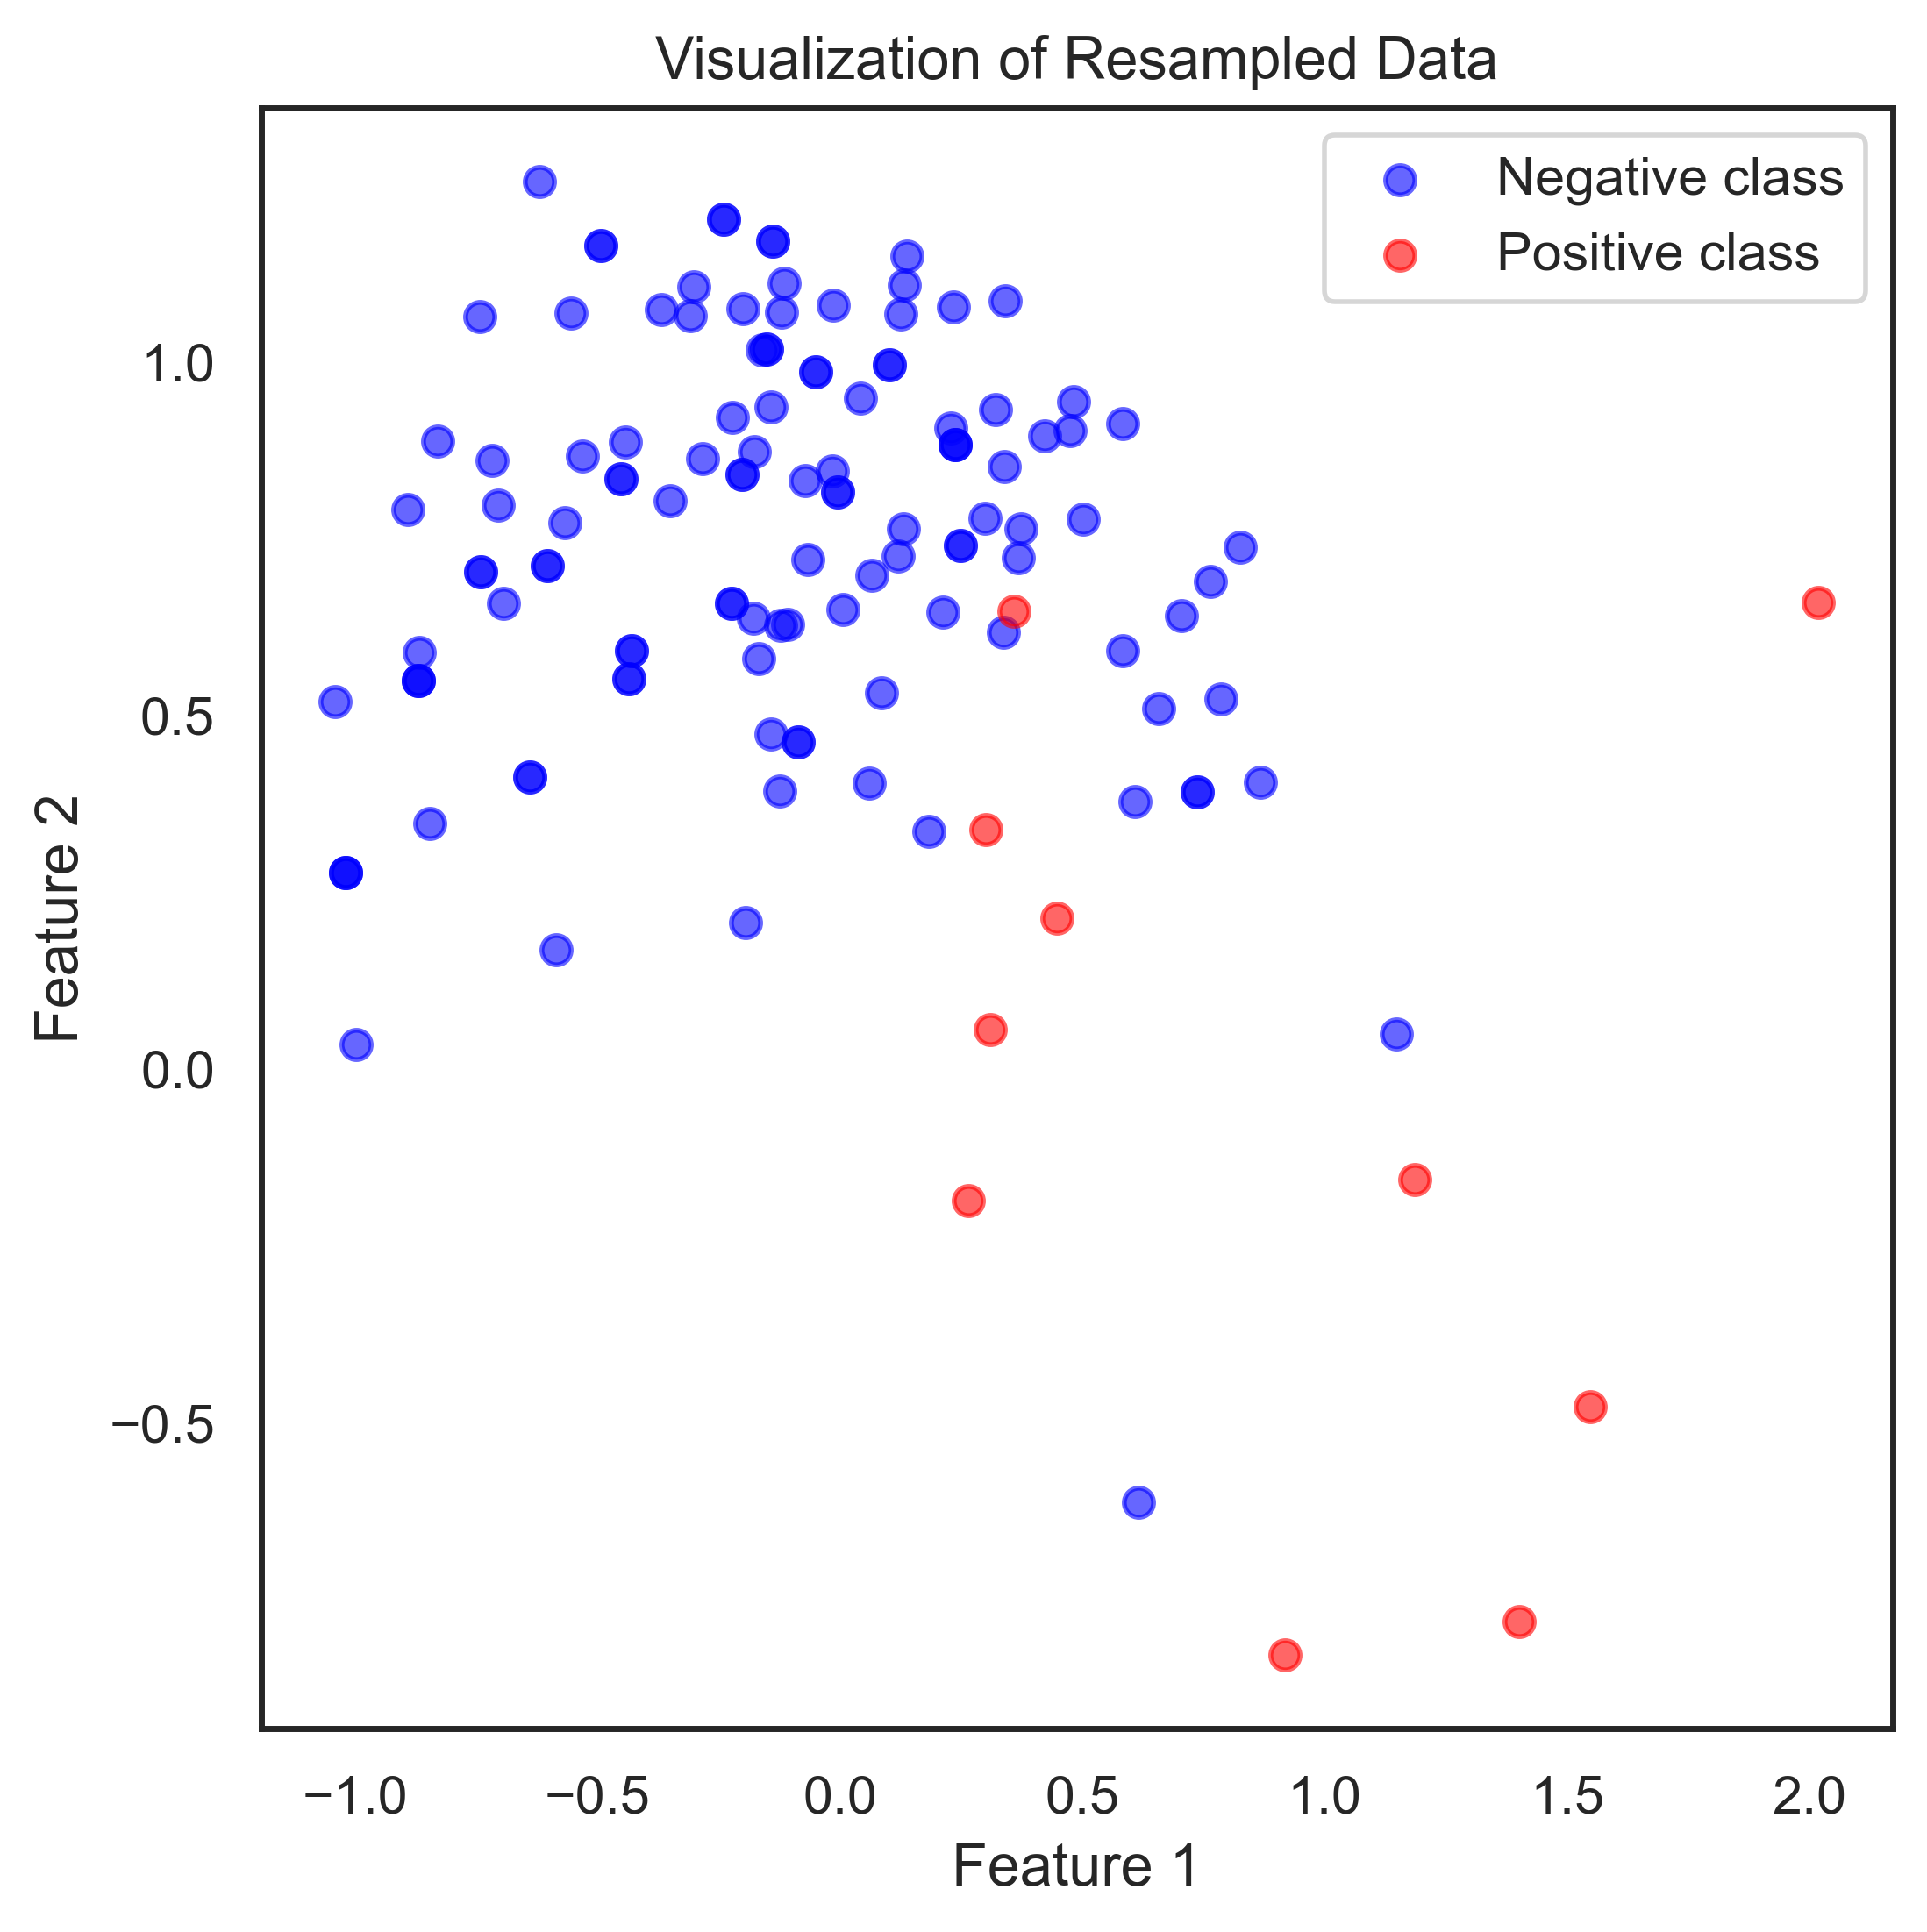

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Load the resampled data (ensure the files are available in your environment)
X_resampled = np.load("X_resampled.npy")
y_resampled = np.load("y_resampled.npy")

# Assuming that the dataset is 2D for visualization (you may need to adjust if it's higher-dimensional)
plt.figure(figsize=(6, 6), dpi=400)

# Plot the positive and negative samples
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='blue', label='Negative class', alpha=0.6)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='red', label='Positive class', alpha=0.6)

# Add labels and title
plt.title("Visualization of Resampled Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Show the plot
plt.show()


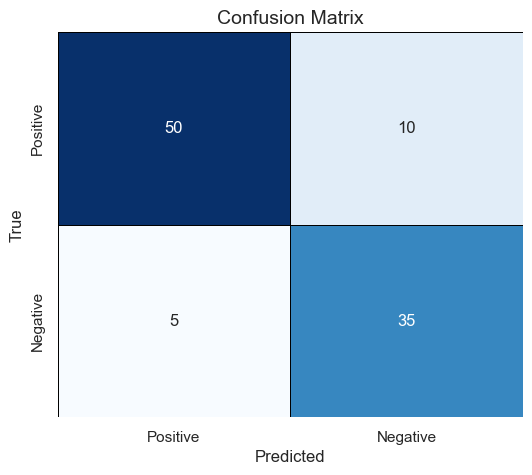

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 示例混淆矩阵
confusion_matrix = np.array([[50, 10],  # [TP, FN]
                             [5,  35]]) # [FP, TN]

# 设置绘图风格
sns.set(style='white', palette='muted')

# 创建一个绘图
plt.figure(figsize=(6, 5))

# 创建热力图
ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
                 xticklabels=['Positive', 'Negative'], 
                 yticklabels=['Positive', 'Negative'], 
                 cbar=False, linewidths=0.5, linecolor='black')

# 添加标题和标签
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

# 显示图像
plt.show()


In [2]:
import inspect
import data_util  # 将 'filename' 替换为实际的 Python 脚本名称

# 获取该模块中的所有函数
functions = [name for name, obj in inspect.getmembers(data_util) if inspect.isfunction(obj) and name.startswith('get')]

print(functions)


['get_WDBC', 'get_car1', 'get_car2', 'get_car3', 'get_ecoli1', 'get_ecoli2', 'get_glass1', 'get_glass2', 'get_glass3', 'get_glass4', 'get_glass5', 'get_haberman', 'get_hepatitis', 'get_liver_disorders1', 'get_liver_disorders2', 'get_liver_disorders3', 'get_liver_disorders4', 'get_page_blocks1', 'get_page_blocks2', 'get_page_blocks3', 'get_page_blocks4', 'get_poker_hand', 'get_statlog_vehicle_silhouettes1', 'get_statlog_vehicle_silhouettes2', 'get_statlog_vehicle_silhouettes3', 'get_statlog_vehicle_silhouettes4', 'get_waveform1', 'get_waveform2', 'get_waveform3', 'get_wine1', 'get_wine2', 'get_yeast1', 'get_yeast2', 'get_yeast3', 'get_yeast4', 'get_yeast5']


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
theta_values = np.linspace(0, 1, 20)
accuracy_data = {
    "Abalone19": (np.random.uniform(0.88, 0.92, 20), "b", "dotted", "o"),
    "Glass015vs2": (np.random.uniform(0.84, 0.86, 20), "c", "dashdot", "D"),
    "Yeast1289vs7": (np.random.uniform(0.9, 0.98, 20), "navy", "solid", "^"),
    "Cleveland0vs4": (np.random.uniform(0.95, 0.96, 20), "r", "dashed", "s"),
    "Page_blocks13vs4": (np.random.uniform(0.96, 0.97, 20), "brown", "dashdot", "p"),
    "Ecoli0137vs26": (np.random.uniform(0.97, 0.99, 20), "g", "dashed", "<"),
    "Vowel0": (np.random.uniform(0.92, 0.93, 20), "purple", "solid", "h"),
    "Yeast2vs8": (np.random.uniform(0.98, 0.99, 20), "black", "solid", "s"),
    "Yeast6": (np.random.uniform(0.97, 0.99, 20), "gold", "solid", "o"),
}

# 创建图像
plt.figure(figsize=(8, 6))

# 画每条曲线
for dataset, (accuracy, color, linestyle, marker) in accuracy_data.items():
    plt.plot(theta_values, accuracy, linestyle=linestyle, color=color, marker=marker, label=dataset)

# 设置标题和标签
plt.title("The accuracy curves of SSHC")
plt.xlabel("The value of \u03bc")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# 显示图表
plt.show()


[0.8542, 0.9739, 0.8243, 0.8081]
[0.8403, 0.9875, 0.9017, 0.8774]
[0.8471, 0.9909, 0.9389, 0.7454]
[0.8925, 0.9966, 0.9722, 0.8165]
[0.9681, 1.0, 1.0, 0.9428]
[0.9324, 0.9977, 0.9765, 0.8819]
[0.9448, 0.9966, 0.9627, 0.9897]
[0.9208, 0.9955, 0.9599, 0.9846]
[0.9393, 0.9949, 0.9535, 0.938]
[0.8987, 0.9966, 0.9722, 0.9794]
[0.9681, 0.9977, 0.9798, 0.9428]
[0.9334, 0.9966, 0.9722, 0.9331]
[0.94, 0.9921, 0.9798, 0.9328]
[0.9556, 0.9921, 0.9297, 0.9283]
[0.9625, 0.9943, 0.946, 0.9794]
[0.9711, 1.0, 1.0, 0.9949]
[0.9711, 0.9977, 0.9765, 0.9949]
[0.9448, 0.9977, 0.9765, 0.9897]
[0.9711, 1.0, 1.0, 0.9949]
[0.9448, 0.9989, 0.9889, 0.9897]
[0.9711, 0.9989, 0.9889, 0.9949]
[0.9208, 0.9989, 0.9889, 0.9846]
[0.9393, 0.9977, 0.9798, 0.938]
(23, 4)
(23, 4)
[10 14 18 22 26 30 34 38 42 46 50 54 58 62 66 70 74 78 82 86 90 94 98]


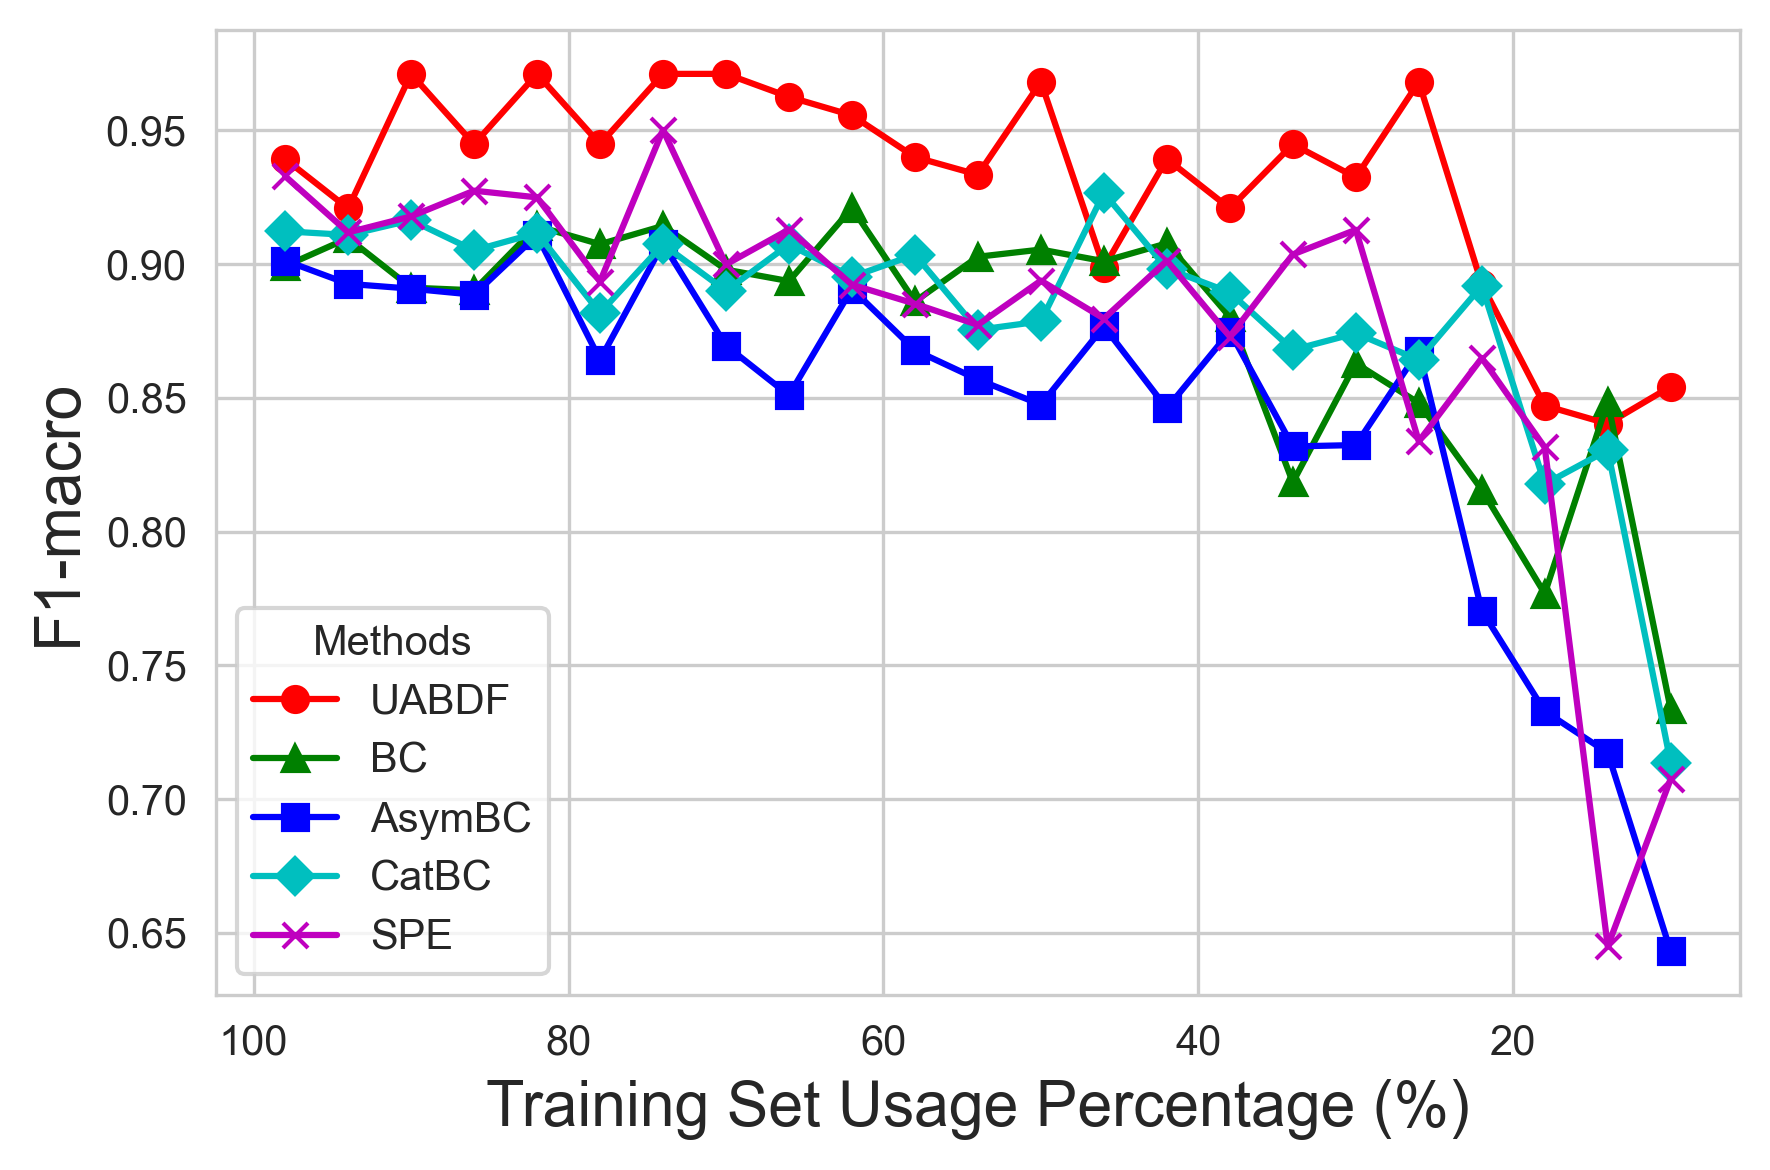

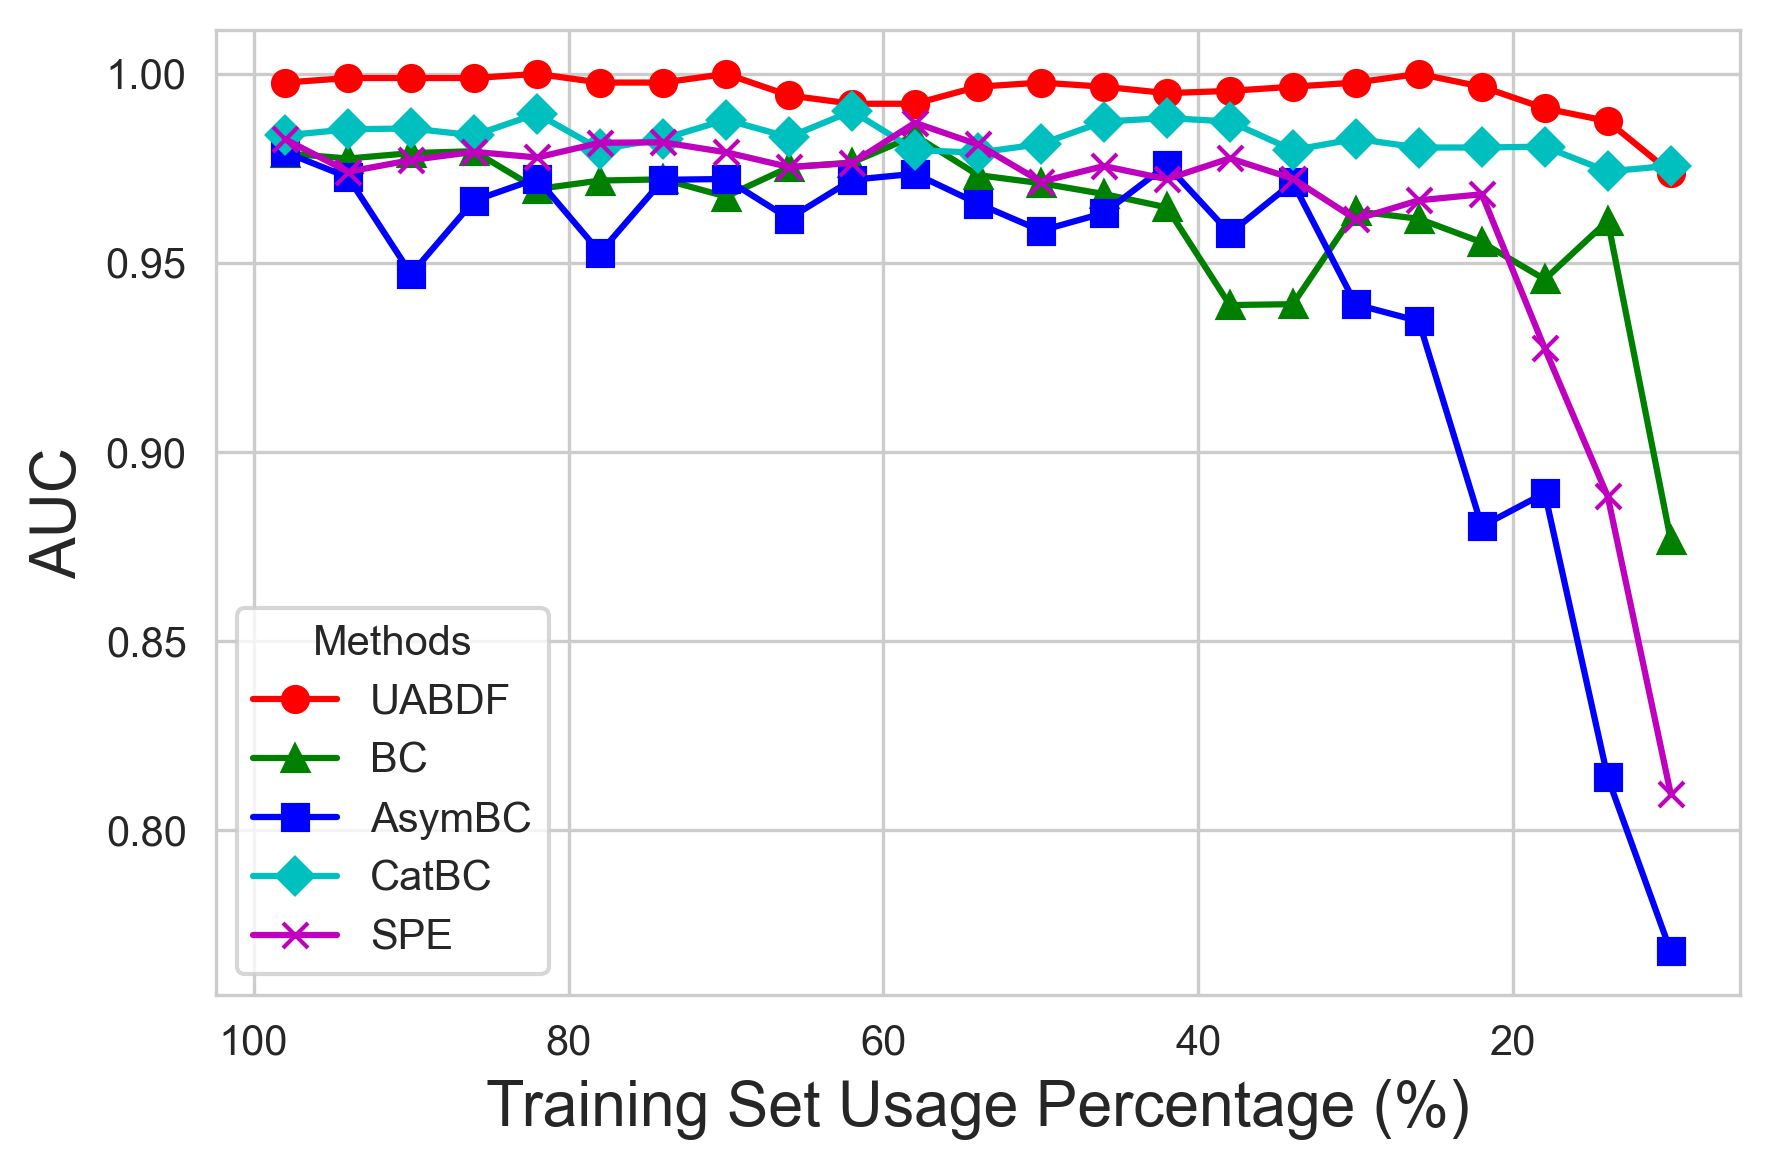

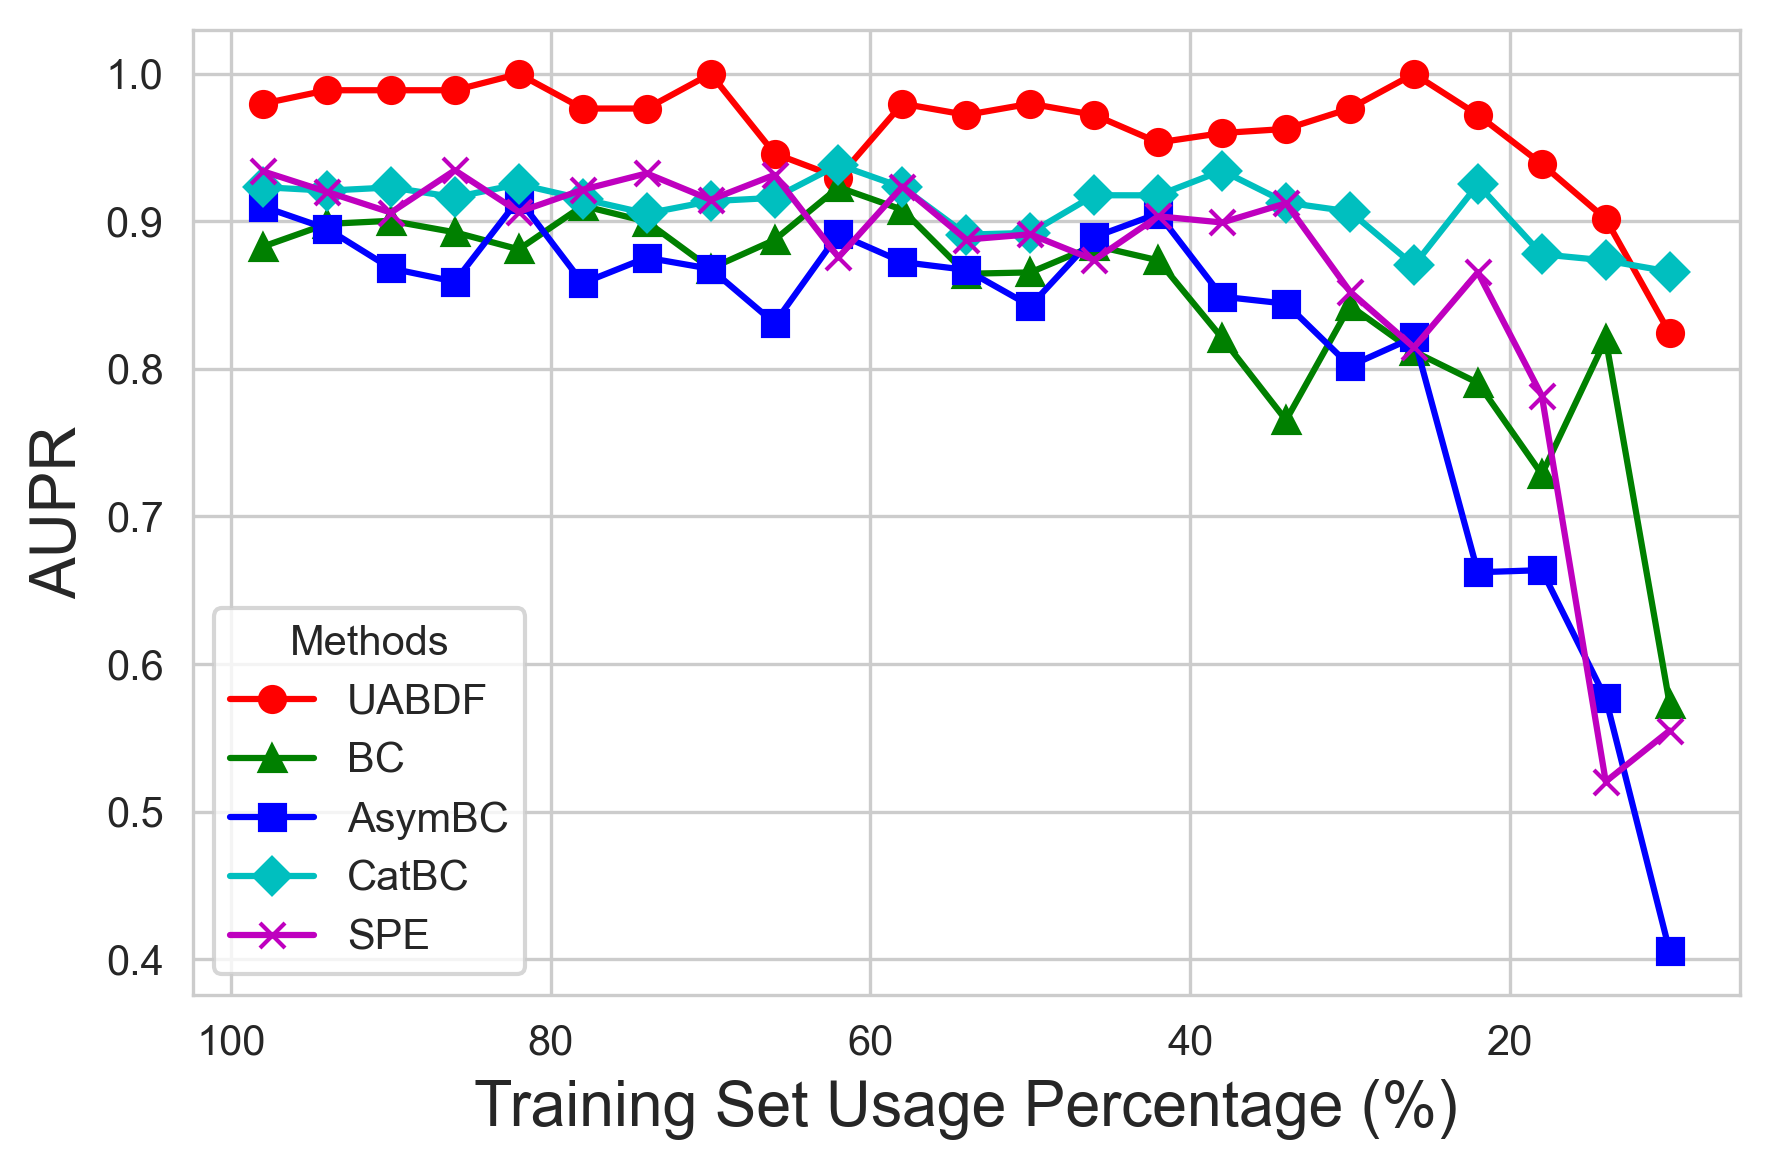

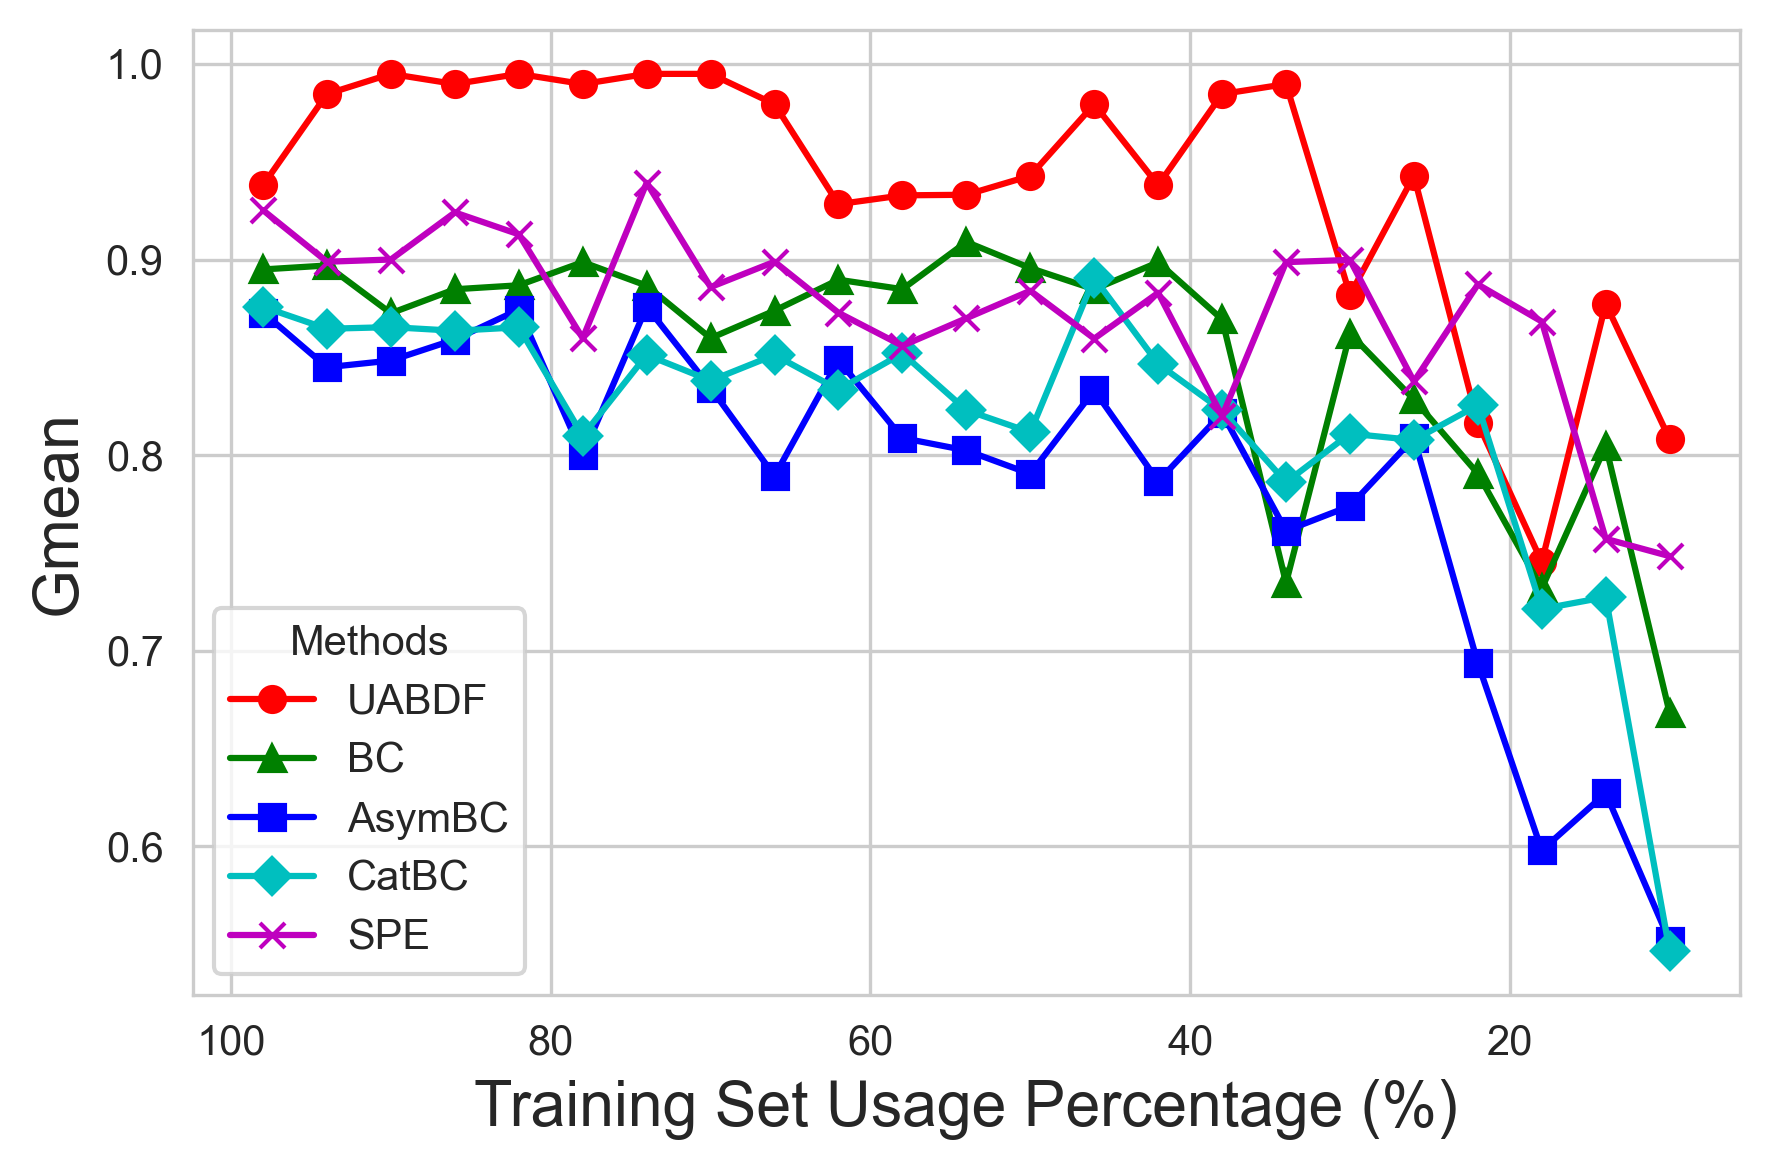

In [33]:
import numpy as np 
data = """
Training size: 10%
F1-macro: 0.8542
AUC: 0.9739
AUPR: 0.8243
Gmean: 0.8081

Training size: 14%
F1-macro: 0.8403
AUC: 0.9875
AUPR: 0.9017
Gmean: 0.8774

Training size: 18%
F1-macro: 0.8471
AUC: 0.9909
AUPR: 0.9389
Gmean: 0.7454

Training size: 22%
F1-macro: 0.8925
AUC: 0.9966
AUPR: 0.9722
Gmean: 0.8165

Training size: 26%
F1-macro: 0.9681
AUC: 1.0000
AUPR: 1.0000
Gmean: 0.9428

Training size: 30%
F1-macro: 0.9324
AUC: 0.9977
AUPR: 0.9765
Gmean: 0.8819

F1-macro: 0.9448
AUC: 0.9966
AUPR: 0.9627
Gmean: 0.9897

Training size: 38%
F1-macro: 0.9208
AUC: 0.9955
AUPR: 0.9599
Gmean: 0.9846

Training size: 42%
F1-macro: 0.9393
AUC: 0.9949
AUPR: 0.9535
Gmean: 0.9380

Training size: 46%
F1-macro: 0.8987
AUC: 0.9966
AUPR: 0.9722
Gmean: 0.9794

Training size: 50%
F1-macro: 0.9681
AUC: 0.9977
AUPR: 0.9798
Gmean: 0.9428

Training size: 54%
F1-macro: 0.9334
AUC: 0.9966
AUPR: 0.9722
Gmean: 0.9331

Training size: 58%
F1-macro: 0.94
AUC: 0.9921
AUPR: 0.9798
Gmean: 0.9328

Training size: 62%
F1-macro: 0.9556
AUC: 0.9921
AUPR: 0.9297
Gmean: 0.9283

Training size: 66%
F1-macro: 0.9625
AUC: 0.9943
AUPR: 0.9460
Gmean: 0.9794

Training size: 70%
F1-macro: 0.9711
AUC: 1.0000
AUPR: 1.0000
Gmean: 0.9949

Training size: 74%
F1-macro: 0.9711
AUC: 0.9977
AUPR: 0.9765
Gmean: 0.9949

Training size: 78%
F1-macro: 0.9448
AUC: 0.9977
AUPR: 0.9765
Gmean: 0.9897

Training size: 82%
F1-macro: 0.9711
AUC: 1.0000
AUPR: 1.0000
Gmean: 0.9949

Training size: 86%
F1-macro: 0.9448
AUC: 0.9989
AUPR: 0.9889
Gmean: 0.9897

Training size: 90%
F1-macro: 0.9711
AUC: 0.9989
AUPR: 0.9889
Gmean: 0.9949

Training size: 94%
F1-macro: 0.9208
AUC: 0.9989
AUPR: 0.9889
Gmean: 0.9846

Training size: 98%
F1-macro: 0.9393
AUC: 0.9977
AUPR: 0.9798
Gmean: 0.9380

"""

# 使用正则表达式提取每个训练集大小和相关指标
import re
import pandas as pd
import matplotlib.pyplot as plt
# 正则表达式模式
pattern = r"F1-macro: ([\d\.]+)\nAUC: ([\d\.]+)\nAUPR: ([\d\.]+)\nGmean: ([\d\.]+)"

# 使用 re.findall 提取所有匹配的数据
matches = re.findall(pattern, data)

# 将提取的结果转换为列表
results = []
for match in matches:
    f1_macro = float(match[0])  # F1-macro
    auc = float(match[1])  # AUC
    aupr = float(match[2])  # AUPR
    gmean = float(match[3])  # Gmean
    results.append([f1_macro, auc, aupr, gmean])

# 打印结果
for result in results:
    print(result)
uabdf_spec = np.array(results)
bc_spec = pd.read_csv("spectrometer_performance_metrics_BC.csv").values
asymbc_spec = pd.read_csv("spectrometer_performance_metrics_AsymBC.csv").values
catbc_spec = pd.read_csv("spectrometer_performance_metrics_CatBC.csv").values
spe_spec = pd.read_csv("spectrometer_performance_metrics_SPE.csv").values

# 打印数据形状
print(uabdf_spec.shape)
print(bc_spec.shape)

# 训练集比例：100% 到 10%
train_sizes = np.arange(10, 101, 4)  # 将比例反转：从 100% 到 10%
print(train_sizes)
# 绘制 F1-macro
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(train_sizes, uabdf_spec[:, 0], marker='o', label='UABDF', color='r', linestyle='-', markersize=6)
plt.plot(train_sizes, bc_spec[:, 0], marker='^', label='BC', color='g', linestyle='-', markersize=6)
plt.plot(train_sizes, asymbc_spec[:, 0], marker='s', label='AsymBC', color='b', linestyle='-', markersize=6)
plt.plot(train_sizes, catbc_spec[:, 0], marker='D', label='CatBC', color='c', linestyle='-', markersize=6)
plt.plot(train_sizes, spe_spec[:, 0], marker='x', label='SPE', color='m', linestyle='-', markersize=6)
plt.xlabel('Training Set Usage Percentage (%)', fontsize=15)
plt.ylabel('F1-macro', fontsize=15)
plt.grid(True)
plt.legend(title="Methods", loc="lower left")
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

# 绘制 AUC
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(train_sizes, uabdf_spec[:, 1], marker='o', label='UABDF', color='r', linestyle='-', markersize=6)
plt.plot(train_sizes, bc_spec[:, 1], marker='^', label='BC', color='g', linestyle='-', markersize=6)
plt.plot(train_sizes, asymbc_spec[:, 1], marker='s', label='AsymBC', color='b', linestyle='-', markersize=6)
plt.plot(train_sizes, catbc_spec[:, 1], marker='D', label='CatBC', color='c', linestyle='-', markersize=6)
plt.plot(train_sizes, spe_spec[:, 1], marker='x', label='SPE', color='m', linestyle='-', markersize=6)
plt.xlabel('Training Set Usage Percentage (%)', fontsize=15)
plt.ylabel('AUC', fontsize=15)
plt.grid(True)
plt.legend(title="Methods", loc="lower left")
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

# 绘制 AUPR
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(train_sizes, uabdf_spec[:, 2], marker='o', label='UABDF', color='r', linestyle='-', markersize=6)
plt.plot(train_sizes, bc_spec[:, 2], marker='^', label='BC', color='g', linestyle='-', markersize=6)
plt.plot(train_sizes, asymbc_spec[:, 2], marker='s', label='AsymBC', color='b', linestyle='-', markersize=6)
plt.plot(train_sizes, catbc_spec[:, 2], marker='D', label='CatBC', color='c', linestyle='-', markersize=6)
plt.plot(train_sizes, spe_spec[:, 2], marker='x', label='SPE', color='m', linestyle='-', markersize=6)
plt.xlabel('Training Set Usage Percentage (%)', fontsize=15)
plt.ylabel('AUPR', fontsize=15)
plt.grid(True)
plt.legend(title="Methods", loc="lower left")
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

# 绘制 Gmean
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(train_sizes, uabdf_spec[:, 3], marker='o', label='UABDF', color='r', linestyle='-', markersize=6)
plt.plot(train_sizes, bc_spec[:, 3], marker='^', label='BC', color='g', linestyle='-', markersize=6)
plt.plot(train_sizes, asymbc_spec[:, 3], marker='s', label='AsymBC', color='b', linestyle='-', markersize=6)
plt.plot(train_sizes, catbc_spec[:, 3], marker='D', label='CatBC', color='c', linestyle='-', markersize=6)
plt.plot(train_sizes, spe_spec[:, 3], marker='x', label='SPE', color='m', linestyle='-', markersize=6)
plt.xlabel('Training Set Usage Percentage (%)', fontsize=15) 
plt.ylabel('Gmean', fontsize=15)
plt.grid(True)
plt.legend(title="Methods", loc="lower left")
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

[0.6606, 0.9038, 0.241, 0.0]
[0.6514, 0.9096, 0.2865, 0.0]
[0.6702, 0.9376, 0.4503, 0.6922]
[0.6995, 0.9274, 0.4221, 0.7429]
[0.7273, 0.9606, 0.4822, 0.8707]
[0.7395, 0.934, 0.4838, 0.7637]
[0.7181, 0.9683, 0.5894, 0.7719]
[0.7296, 0.9617, 0.4093, 0.6236]
[0.7181, 0.9355, 0.4529, 0.819]
[0.7075, 0.9721, 0.5701, 0.6291]
[0.701, 0.9359, 0.4487, 0.6269]
[0.6961, 0.9429, 0.4908, 0.6959]
[0.6961, 0.9449, 0.4192, 0.6959]
[0.7379, 0.9721, 0.6455, 0.7678]
[0.7253, 0.9434, 0.4813, 0.7022]
[0.7253, 0.9585, 0.5116, 0.7022]
[0.7102, 0.9305, 0.4599, 0.6922]
[0.7285, 0.947, 0.4244, 0.6997]
[0.7379, 0.9516, 0.5517, 0.7678]
[0.7168, 0.9589, 0.4784, 0.6984]
[0.7413, 0.9578, 0.5163, 0.7009]
[0.7168, 0.9568, 0.5257, 0.6984]
[0.706, 0.953, 0.5465, 0.6972]
(23, 4)
(23, 4)
[10 14 18 22 26 30 34 38 42 46 50 54 58 62 66 70 74 78 82 86 90 94 98]


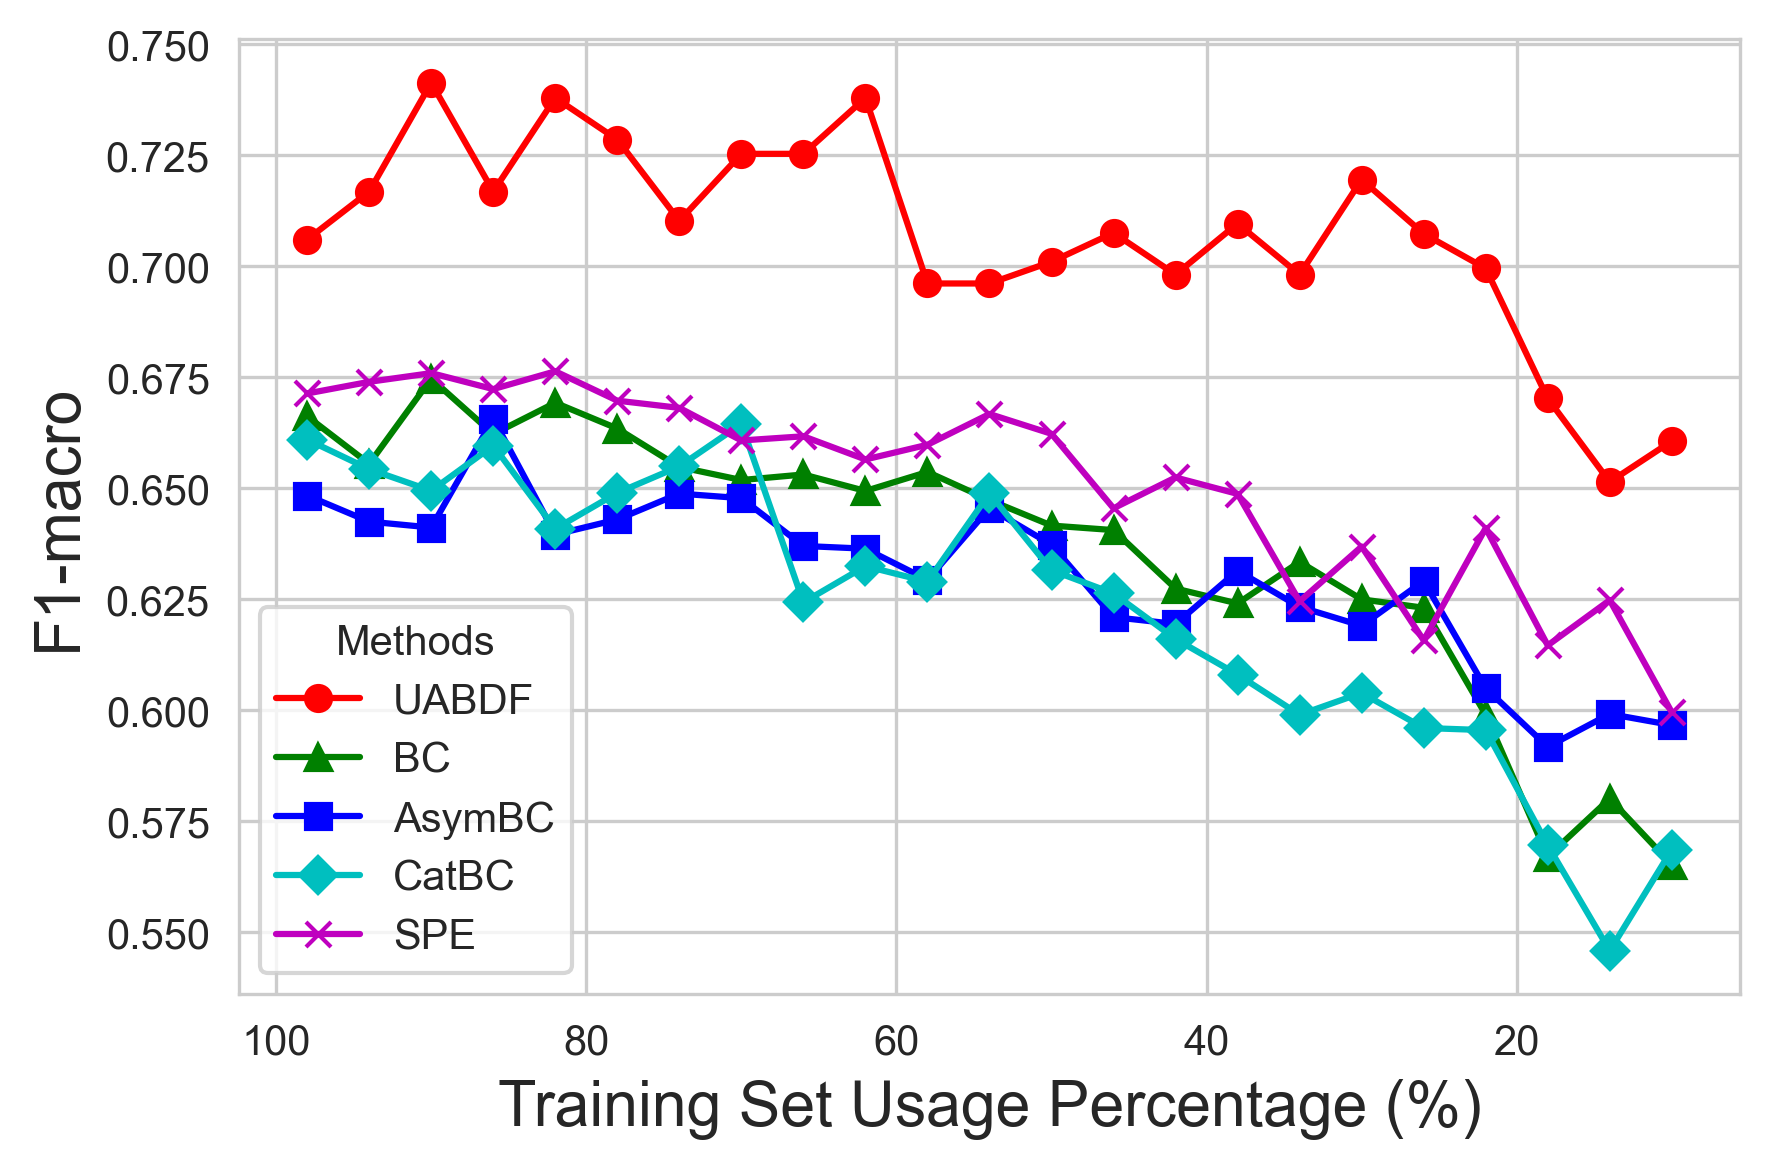

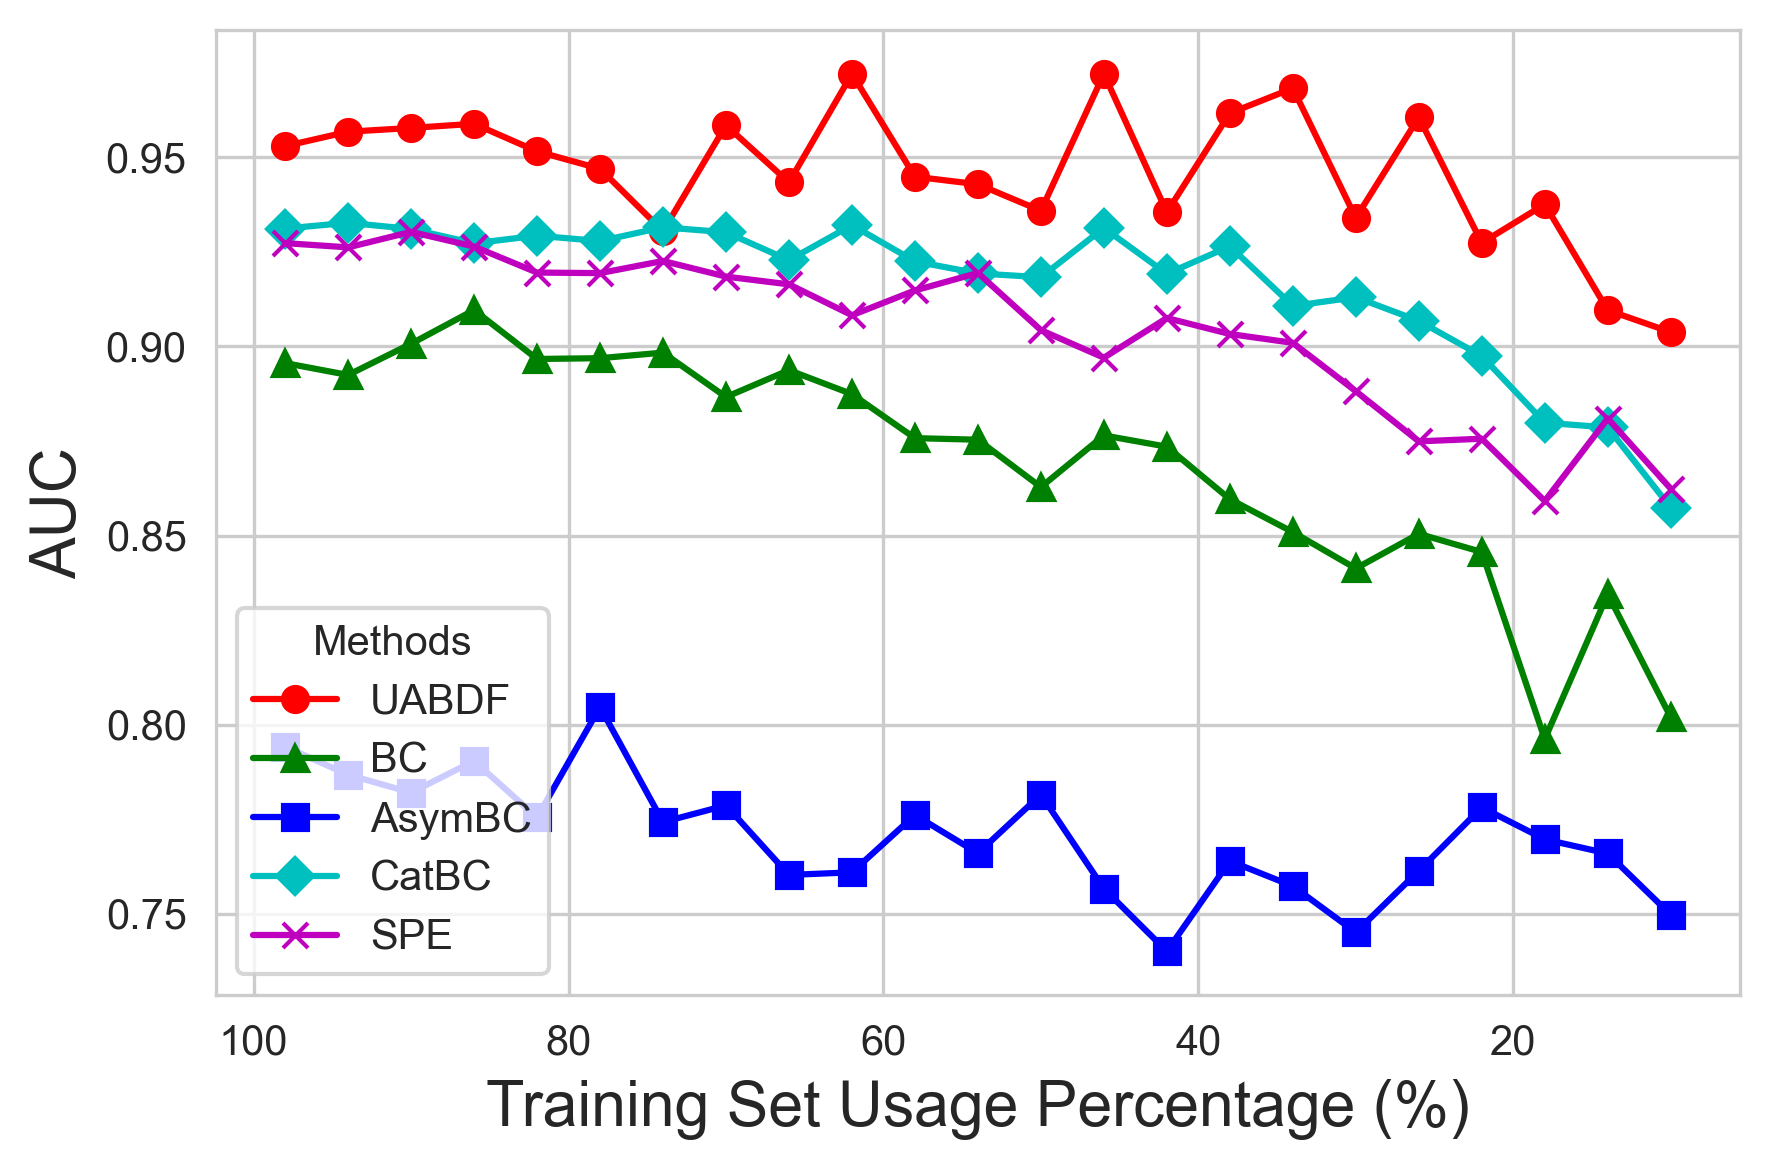

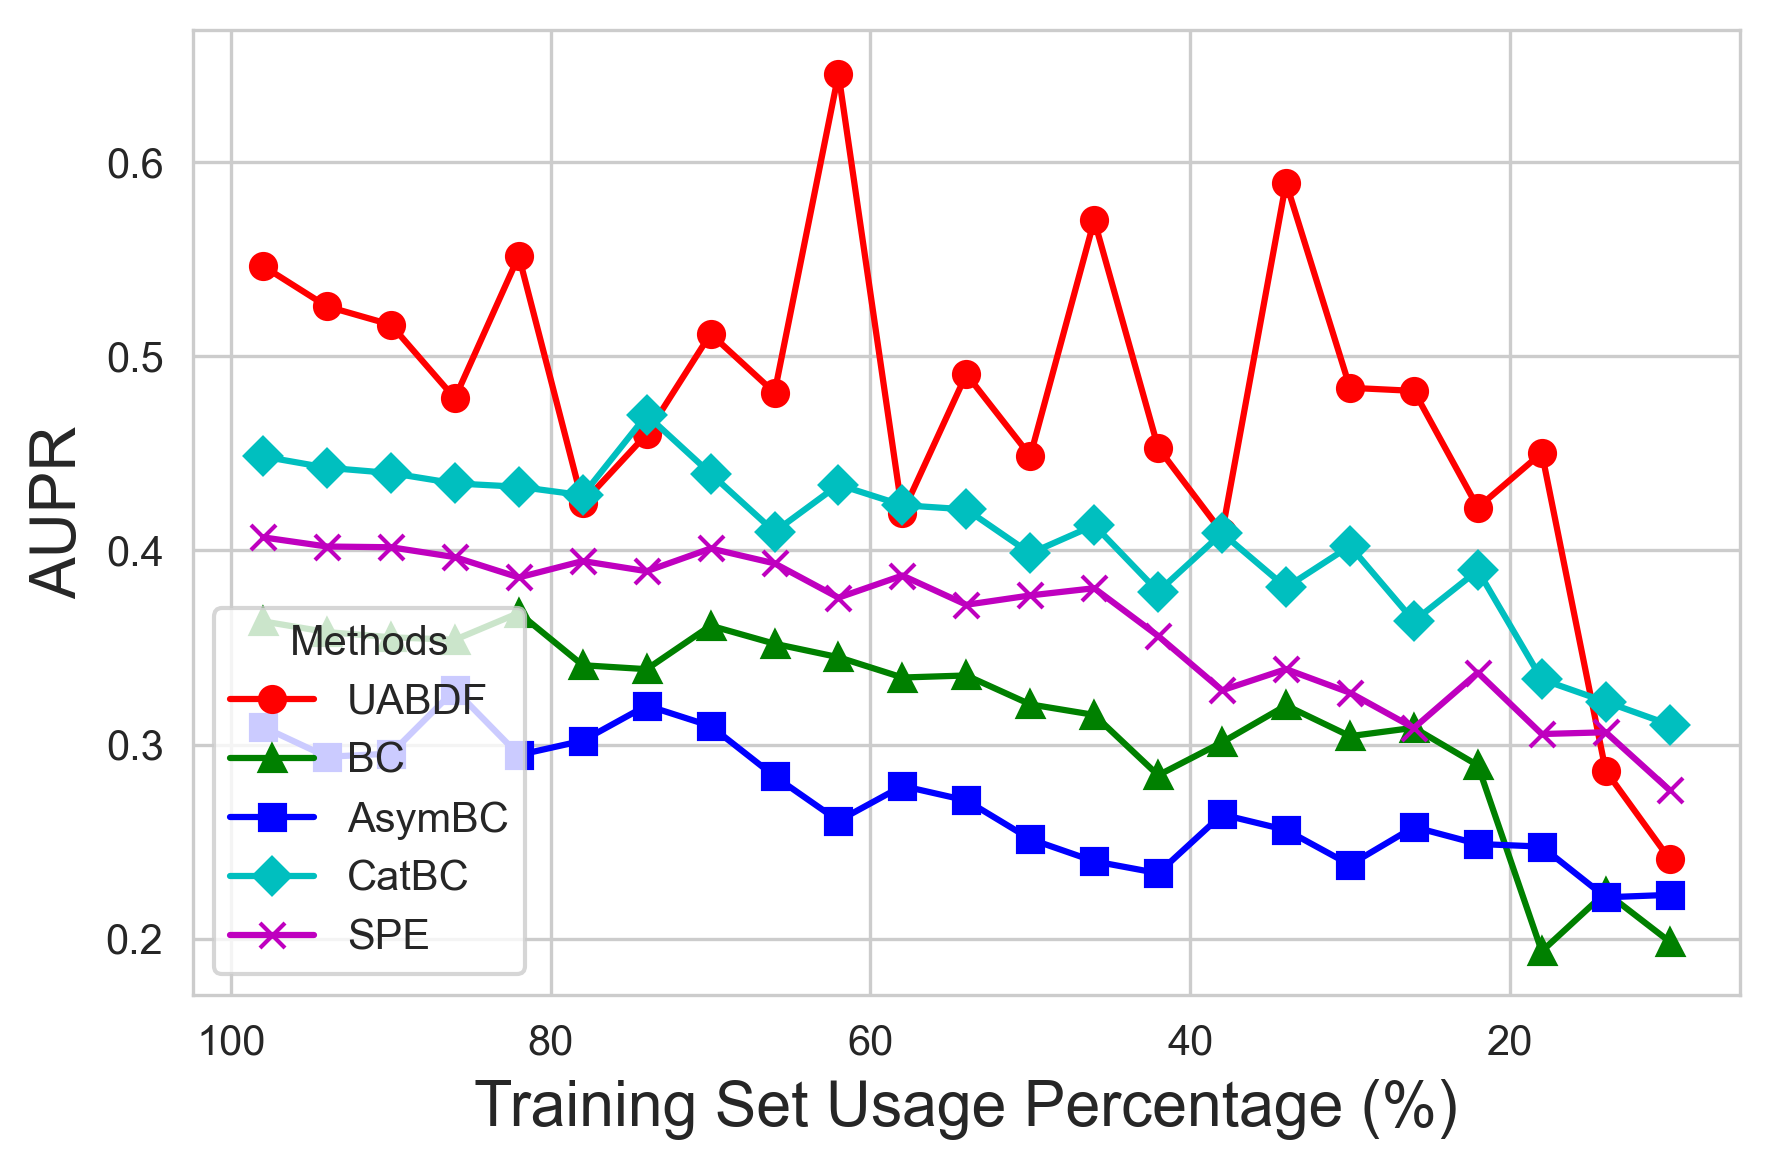

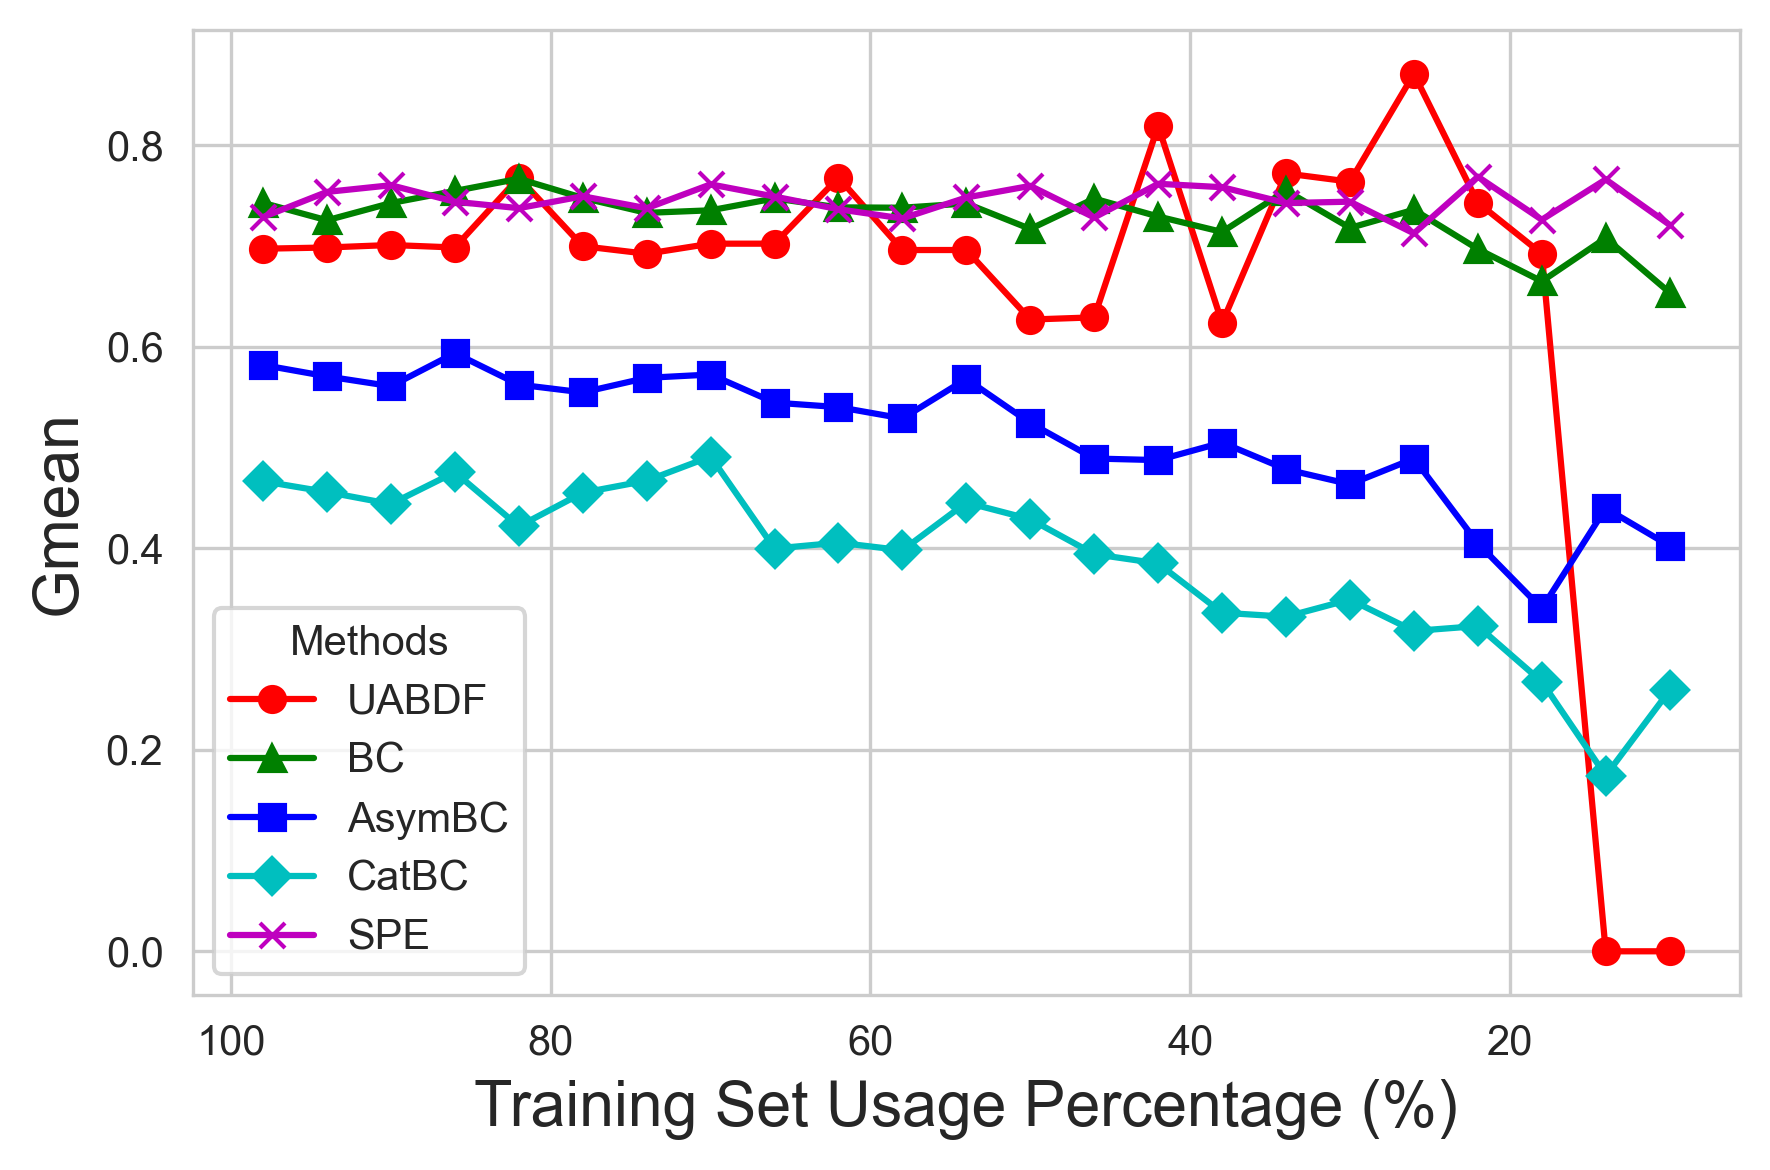

In [17]:
import numpy as np 

# 使用正则表达式提取每个训练集大小和相关指标
import re
import pandas as pd
import matplotlib.pyplot as plt

# 打印结果
for result in results:
    print(result)
results = [
    [0.6606, 0.9038, 0.241, 0.0],
[0.6514, 0.9096, 0.2865, 0.0],
[0.6702, 0.9376, 0.4503, 0.6922],
[0.6995, 0.9274, 0.4221, 0.7429],
[0.7073, 0.9606, 0.4822, 0.8707],
[0.7195, 0.934, 0.4838, 0.7637],
[0.6981, 0.9683, 0.5894, 0.7719],
[0.7096, 0.9617, 0.4093, 0.6236],
[0.6981, 0.9355, 0.4529, 0.819],
[0.7075, 0.9721, 0.5701, 0.6291],
[0.701, 0.9359, 0.4487, 0.6269],
[0.6961, 0.9429, 0.4908, 0.6959],
[0.6961, 0.9449, 0.4192, 0.6959],
[0.7379, 0.9721, 0.6455, 0.7678],
[0.7253, 0.9434, 0.4813, 0.7022],
[0.7253, 0.9585, 0.5116, 0.7022],
[0.7102, 0.9305, 0.4599, 0.6922],
[0.7285, 0.947, 0.4244, 0.6997],
[0.7379, 0.9516, 0.5517, 0.7678],
[0.7168, 0.9589, 0.4784, 0.6984],
[0.7413, 0.9578, 0.5163, 0.7009],
[0.7168, 0.9568, 0.5257, 0.6984],
[0.706, 0.953, 0.5465, 0.6972]
]
uabdf_spec = np.array(results)
bc_spec = pd.read_csv("yeast5_performance_metrics_BC.csv").values
asymbc_spec = pd.read_csv("yeast5_performance_metrics_AsymBC.csv").values
catbc_spec = pd.read_csv("yeast5_performance_metrics_CatBC.csv").values
spe_spec = pd.read_csv("yeast5_performance_metrics_SPE.csv").values

# 打印数据形状
print(uabdf_spec.shape)
print(bc_spec.shape)

# 训练集比例：100% 到 10%
train_sizes = np.arange(10, 101, 4)  # 将比例反转：从 100% 到 10%
print(train_sizes)
# 绘制 F1-macro
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(train_sizes, uabdf_spec[:, 0], marker='o', label='UABDF', color='r', linestyle='-', markersize=6)
plt.plot(train_sizes, bc_spec[:, 0], marker='^', label='BC', color='g', linestyle='-', markersize=6)
plt.plot(train_sizes, asymbc_spec[:, 0], marker='s', label='AsymBC', color='b', linestyle='-', markersize=6)
plt.plot(train_sizes, catbc_spec[:, 0], marker='D', label='CatBC', color='c', linestyle='-', markersize=6)
plt.plot(train_sizes, spe_spec[:, 0], marker='x', label='SPE', color='m', linestyle='-', markersize=6)
plt.xlabel('Training Set Usage Percentage (%)', fontsize=15)
plt.ylabel('F1-macro', fontsize=15)
plt.grid(True)
plt.legend(title="Methods", loc="lower left")
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

# 绘制 AUC
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(train_sizes, uabdf_spec[:, 1], marker='o', label='UABDF', color='r', linestyle='-', markersize=6)
plt.plot(train_sizes, bc_spec[:, 1], marker='^', label='BC', color='g', linestyle='-', markersize=6)
plt.plot(train_sizes, asymbc_spec[:, 1], marker='s', label='AsymBC', color='b', linestyle='-', markersize=6)
plt.plot(train_sizes, catbc_spec[:, 1], marker='D', label='CatBC', color='c', linestyle='-', markersize=6)
plt.plot(train_sizes, spe_spec[:, 1], marker='x', label='SPE', color='m', linestyle='-', markersize=6)
plt.xlabel('Training Set Usage Percentage (%)', fontsize=15)
plt.ylabel('AUC', fontsize=15)
plt.grid(True)
plt.legend(title="Methods", loc="lower left")
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

# 绘制 AUPR
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(train_sizes, uabdf_spec[:, 2], marker='o', label='UABDF', color='r', linestyle='-', markersize=6)
plt.plot(train_sizes, bc_spec[:, 2], marker='^', label='BC', color='g', linestyle='-', markersize=6)
plt.plot(train_sizes, asymbc_spec[:, 2], marker='s', label='AsymBC', color='b', linestyle='-', markersize=6)
plt.plot(train_sizes, catbc_spec[:, 2], marker='D', label='CatBC', color='c', linestyle='-', markersize=6)
plt.plot(train_sizes, spe_spec[:, 2], marker='x', label='SPE', color='m', linestyle='-', markersize=6)
plt.xlabel('Training Set Usage Percentage (%)', fontsize=15)
plt.ylabel('AUPR', fontsize=15)
plt.grid(True)
plt.legend(title="Methods", loc="lower left")
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

# 绘制 Gmean
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(train_sizes, uabdf_spec[:, 3], marker='o', label='UABDF', color='r', linestyle='-', markersize=6)
plt.plot(train_sizes, bc_spec[:, 3], marker='^', label='BC', color='g', linestyle='-', markersize=6)
plt.plot(train_sizes, asymbc_spec[:, 3], marker='s', label='AsymBC', color='b', linestyle='-', markersize=6)
plt.plot(train_sizes, catbc_spec[:, 3], marker='D', label='CatBC', color='c', linestyle='-', markersize=6)
plt.plot(train_sizes, spe_spec[:, 3], marker='x', label='SPE', color='m', linestyle='-', markersize=6)
plt.xlabel('Training Set Usage Percentage (%)', fontsize=15) 
plt.ylabel('Gmean', fontsize=15)
plt.grid(True)
plt.legend(title="Methods", loc="lower left")
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

In [18]:
import numpy as np 
from pathlib import Path
data = Path(r"C:\Users\10928\Documents\GitHub\DGBDF\libras_move_hyperparameter_res.txt").read_text(encoding='utf-8')
# 使用正则表达式提取每个训练集大小和相关指标
import re
import pandas as pd
import matplotlib.pyplot as plt
# 正则表达式模式
pattern = r"F1-macro: ([\d\.]+)\nAUC: ([\d\.]+)\nAUPR: ([\d\.]+)\nGmean: ([\d\.]+)"

# 使用 re.findall 提取所有匹配的数据
matches = re.findall(pattern, data)

# 将提取的结果转换为列表
results = []
for match in matches:
    f1_macro = float(match[0])  # F1-macro
    auc = float(match[1])  # AUC
    aupr = float(match[2])  # AUPR
    gmean = float(match[3])  # Gmean
    results.append([f1_macro, auc, aupr, gmean])

# 打印结果
for result in results:
    print(result)

results = np.array(results)
print(results.shape)
print(results[:, 0])
f1 = results[:, 0].reshape(-1, 11)
print(f1)
res = np.mean(f1, axis=0)
print(res)

[0.8676, 0.994, 0.9267, 0.7746]
[0.8676, 0.994, 0.9267, 0.7746]
[0.8676, 0.994, 0.9267, 0.7746]
[0.8676, 0.997, 0.9667, 0.7746]
[0.8676, 1.0, 1.0, 0.7746]
[0.8676, 0.994, 0.9267, 0.7746]
[0.8676, 0.994, 0.9267, 0.7746]
[0.8676, 0.994, 0.9267, 0.7746]
[0.8676, 0.994, 0.9267, 0.7746]
[0.8676, 1.0, 1.0, 0.7746]
[0.8676, 0.994, 0.9267, 0.7746]
[0.9508, 1.0, 1.0, 0.9925]
[1.0, 1.0, 1.0, 1.0]
[0.9407, 1.0, 1.0, 0.8944]
[1.0, 1.0, 1.0, 1.0]
[0.9508, 1.0, 1.0, 0.9925]
[1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0]
[0.9508, 1.0, 1.0, 0.9925]
[1.0, 1.0, 1.0, 1.0]
[0.9407, 1.0, 1.0, 0.8944]
[0.9407, 1.0, 1.0, 0.8944]
[0.9407, 1.0, 1.0, 0.8944]
[0.9407, 1.0, 1.0, 0.8944]
[0.9407, 1.0, 1.0, 0.8944]
[0.9407, 1.0, 1.0, 0.8944]
[0.9407, 1.0, 1.0, 0.8944]
[0.9407, 1.0, 1.0, 0.8944]
[0.9407, 1.0, 1.0, 0.8944]
[0.9407, 1.0, 1.0, 0.8944]
[0.9407, 1.0, 1.0, 0.8944]
[0.8182, 0.9582, 0.7458, 0.8742]
[0.8182, 0.9493, 0.6931, 0.8742]
[0.8182, 0.9597, 0.72, 0.8742]
[0.8182, 

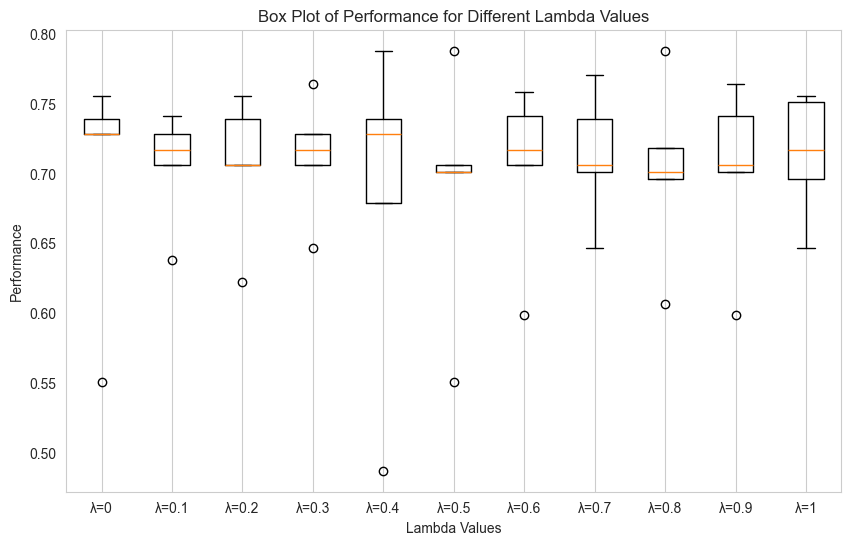

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
# data = [
#     [0.7168, 0.6961, 0.701, 0.6895, 0.706, 0.6562, 0.7413, 0.7553, 0.6562, 0.7285, 0.6669],
#     [0.6562, 0.5922, 0.6238, 0.6064, 0.6064, 0.6466, 0.6146, 0.6064, 0.6146, 0.6466, 0.6146],
#     [0.6155, 0.638, 0.6314, 0.6556, 0.6155, 0.6314, 0.6702, 0.6627, 0.6314, 0.6224, 0.6033],
#     [0.6562, 0.6466, 0.6378, 0.6961, 0.6895, 0.6961, 0.7285, 0.6562, 0.6608, 0.6562, 0.6224],
#     [0.764, 0.7778, 0.7778, 0.7778, 0.764, 0.7778, 0.7778, 0.7778, 0.764, 0.793, 0.7778]
# ]
data = f1
# 转换为 numpy 数组
data = np.array(data)

# 绘制箱线图
plt.figure(figsize=(10, 6))
plt.boxplot(data)
plt.xticks(ticks=range(1, data.shape[1]+1), labels=[f'λ={i}' for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]])
plt.xlabel('Lambda Values')
plt.ylabel('Performance')
plt.title('Box Plot of Performance for Different Lambda Values')
plt.grid(axis='y')
plt.show()
